In [75]:
# Import Modules
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib
import os
import copy

import warnings
import itertools

from pylab import rcParams
from scipy import stats

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')


# Data Loading and Visualization

In [76]:
###Set Path###
#path_nico = 'D:/Nicolas/Ecole/ENPC/Autres/PFE/Recherche PFE/Tests/Descartes/'
#path = path_nico
#os.chdir(os.path.dirname(path))

###Load Data from CSV file###
#data_train=pd.read_csv('train_auto.csv',index_col=0,header=0,sep=',')


In [77]:
# Access files from Google Drive and loading for Google Drive
from google.colab import drive 
drive.mount('/content/gdrive')

data_train = pd.read_csv("./gdrive/My Drive/Colab_Notebooks/Descartes/train_auto.csv",index_col=0,header=0,sep=',')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [78]:
#we have a first look at data characteristics
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8161 entries, 1 to 10302
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TARGET_FLAG  8161 non-null   int64  
 1   TARGET_AMT   8161 non-null   float64
 2   KIDSDRIV     8161 non-null   int64  
 3   AGE          8155 non-null   float64
 4   HOMEKIDS     8161 non-null   int64  
 5   YOJ          7707 non-null   float64
 6   INCOME       7716 non-null   object 
 7   PARENT1      8161 non-null   object 
 8   HOME_VAL     7697 non-null   object 
 9   MSTATUS      8161 non-null   object 
 10  SEX          8161 non-null   object 
 11  EDUCATION    8161 non-null   object 
 12  JOB          7635 non-null   object 
 13  TRAVTIME     8161 non-null   int64  
 14  CAR_USE      8161 non-null   object 
 15  BLUEBOOK     8161 non-null   object 
 16  TIF          8161 non-null   int64  
 17  CAR_TYPE     8161 non-null   object 
 18  RED_CAR      8161 non-null   object 
 19  OLDCL

In [79]:
data_train.columns

Index(['TARGET_FLAG', 'TARGET_AMT', 'KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ',
       'INCOME', 'PARENT1', 'HOME_VAL', 'MSTATUS', 'SEX', 'EDUCATION', 'JOB',
       'TRAVTIME', 'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR',
       'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CAR_AGE', 'URBANICITY'],
      dtype='object')

In [80]:
data_train

,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
INDEX,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0.0,0,60.0,0,11.0,"$67,349",No,$0,z_No,M,PhD,Professional,14,Private,"$14,230",11,Minivan,yes,"$4,461",2,No,3,18.0,Highly Urban/ Urban
2,0,0.0,0,43.0,0,11.0,"$91,449",No,"$257,252",z_No,M,z_High School,z_Blue Collar,22,Commercial,"$14,940",1,Minivan,yes,$0,0,No,0,1.0,Highly Urban/ Urban
4,0,0.0,0,35.0,1,10.0,"$16,039",No,"$124,191",Yes,z_F,z_High School,Clerical,5,Private,"$4,010",4,z_SUV,no,"$38,690",2,No,3,10.0,Highly Urban/ Urban
5,0,0.0,0,51.0,0,14.0,NaN,No,"$306,251",Yes,M,<High School,z_Blue Collar,32,Private,"$15,440",7,Minivan,yes,$0,0,No,0,6.0,Highly Urban/ Urban
6,0,0.0,0,50.0,0,NaN,"$114,986",No,"$243,925",Yes,z_F,PhD,Doctor,36,Private,"$18,000",1,z_SUV,no,"$19,217",2,Yes,3,17.0,Highly Urban/ Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,0,0.0,0,35.0,0,11.0,"$43,112",No,$0,z_No,M,z_High School,z_Blue Collar,51,Commercial,"$27,330",10,Panel Truck,yes,$0,0,No,0,8.0,z_Highly Rural/ Rural
10298,0,0.0,1,45.0,2,9.0,"$164,669",No,"$386,273",Yes,M,PhD,Manager,21,Private,"$13,270",15,Minivan,no,$0,0,No,2,17.0,Highly Urban/ Urban
10299,0,0.0,0,46.0,0,9.0,"$107,204",No,"$332,591",Yes,M,Masters,NaN,36,Commercial,"$24,490",6,Panel Truck,no,$0,0,No,0,1.0,Highly Urban/ Urban


In [82]:
#drop the TARGET_AMT column, which we will not deal with
data_train = data_train.drop('TARGET_AMT', axis='columns')

In [81]:
#define a list with all the columns
allcolumns_train = ['TARGET_FLAG', 'KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'PARENT1', 'HOME_VAL', 'MSTATUS', 'SEX', 'EDUCATION', 'JOB', 'TRAVTIME', 'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR', 'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CAR_AGE', 'URBANICITY']

In [83]:
#visualize the data in every column
data_train.head(10)

,TARGET_FLAG,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
INDEX,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,60.0,0,11.0,"$67,349",No,$0,z_No,M,PhD,Professional,14,Private,"$14,230",11,Minivan,yes,"$4,461",2,No,3,18.0,Highly Urban/ Urban
2,0,0,43.0,0,11.0,"$91,449",No,"$257,252",z_No,M,z_High School,z_Blue Collar,22,Commercial,"$14,940",1,Minivan,yes,$0,0,No,0,1.0,Highly Urban/ Urban
4,0,0,35.0,1,10.0,"$16,039",No,"$124,191",Yes,z_F,z_High School,Clerical,5,Private,"$4,010",4,z_SUV,no,"$38,690",2,No,3,10.0,Highly Urban/ Urban
5,0,0,51.0,0,14.0,NaN,No,"$306,251",Yes,M,<High School,z_Blue Collar,32,Private,"$15,440",7,Minivan,yes,$0,0,No,0,6.0,Highly Urban/ Urban
6,0,0,50.0,0,NaN,"$114,986",No,"$243,925",Yes,z_F,PhD,Doctor,36,Private,"$18,000",1,z_SUV,no,"$19,217",2,Yes,3,17.0,Highly Urban/ Urban
7,1,0,34.0,1,12.0,"$125,301",Yes,$0,z_No,z_F,Bachelors,z_Blue Collar,46,Commercial,"$17,430",1,Sports Car,no,$0,0,No,0,7.0,Highly Urban/ Urban
8,0,0,54.0,0,NaN,"$18,755",No,NaN,Yes,z_F,<High School,z_Blue Collar,33,Private,"$8,780",1,z_SUV,no,$0,0,No,0,1.0,Highly Urban/ Urban
11,1,1,37.0,2,NaN,"$107,961",No,"$333,680",Yes,M,Bachelors,z_Blue Collar,44,Commercial,"$16,970",1,Van,yes,"$2,374",1,Yes,10,7.0,Highly Urban/ Urban
12,1,0,34.0,0,10.0,"$62,978",No,$0,z_No,z_F,Bachelors,Clerical,34,Private,"$11,200",1,z_SUV,no,$0,0,No,0,1.0,Highly Urban/ Urban


In [84]:
#since all columns are not visible in the cell above, split the DataFrame to visualize it
columns_part1 = ['TARGET_FLAG', 'KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'PARENT1', 'HOME_VAL', 'MSTATUS', 'SEX', 'EDUCATION', 'JOB', 'TRAVTIME', 'CAR_USE']
columns_part2 = ['BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR', 'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CAR_AGE', 'URBANICITY']

df_visualization1 = data_train[columns_part1]
df_visualization2 = data_train[columns_part2]

In [85]:
df_visualization1.head(10)

,TARGET_FLAG,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE
INDEX,,,,,,,,,,,,,,
1,0,0,60.0,0,11.0,"$67,349",No,$0,z_No,M,PhD,Professional,14,Private
2,0,0,43.0,0,11.0,"$91,449",No,"$257,252",z_No,M,z_High School,z_Blue Collar,22,Commercial
4,0,0,35.0,1,10.0,"$16,039",No,"$124,191",Yes,z_F,z_High School,Clerical,5,Private
5,0,0,51.0,0,14.0,NaN,No,"$306,251",Yes,M,<High School,z_Blue Collar,32,Private
6,0,0,50.0,0,NaN,"$114,986",No,"$243,925",Yes,z_F,PhD,Doctor,36,Private
7,1,0,34.0,1,12.0,"$125,301",Yes,$0,z_No,z_F,Bachelors,z_Blue Collar,46,Commercial
8,0,0,54.0,0,NaN,"$18,755",No,NaN,Yes,z_F,<High School,z_Blue Collar,33,Private
11,1,1,37.0,2,NaN,"$107,961",No,"$333,680",Yes,M,Bachelors,z_Blue Collar,44,Commercial
12,1,0,34.0,0,10.0,"$62,978",No,$0,z_No,z_F,Bachelors,Clerical,34,Private


In [86]:
df_visualization2.head(10)

,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
INDEX,,,,,,,,,,
1,"$14,230",11,Minivan,yes,"$4,461",2,No,3,18.0,Highly Urban/ Urban
2,"$14,940",1,Minivan,yes,$0,0,No,0,1.0,Highly Urban/ Urban
4,"$4,010",4,z_SUV,no,"$38,690",2,No,3,10.0,Highly Urban/ Urban
5,"$15,440",7,Minivan,yes,$0,0,No,0,6.0,Highly Urban/ Urban
6,"$18,000",1,z_SUV,no,"$19,217",2,Yes,3,17.0,Highly Urban/ Urban
7,"$17,430",1,Sports Car,no,$0,0,No,0,7.0,Highly Urban/ Urban
8,"$8,780",1,z_SUV,no,$0,0,No,0,1.0,Highly Urban/ Urban
11,"$16,970",1,Van,yes,"$2,374",1,Yes,10,7.0,Highly Urban/ Urban
12,"$11,200",1,z_SUV,no,$0,0,No,0,1.0,Highly Urban/ Urban


# Data Preprocessing

In [87]:
df_train = data_train.copy()

## String to numerical

In [88]:
#We see that some columns are categorized as object because of a $ sign while they should actually be numerical
#We list them in the following list and modifiy them with a dollarsum_to_int function
shouldBeNum = ['INCOME', 'HOME_VAL', 'BLUEBOOK', 'OLDCLAIM']

In [89]:
#function that transforms dollar sums to int values
def dollarsum_to_int(dollarsum):
    """takes a string denoting a sum in the form '$+float' and returns the associated float
    """
    #try to subscript the dollarsum
    try:
        if dollarsum[0]=="$":
            #delete the "," as thousand separators
            dollarsum = dollarsum.replace(",", "", 3)
            #convert the string to a float
            intsum = float(dollarsum[1:])
        else :
            intsum = np.nan
    #if the subscript does not work, dollarsum is already an float (or a nan)
    except :
        intsum = dollarsum
    #return the value of intsum (nan, )
    return(intsum)

#we vectorize it
dollarsum_to_int_vect = np.vectorize(dollarsum_to_int)


In [90]:
#use the function on the columns listes above 

for col in shouldBeNum : 
    df_train[col] = dollarsum_to_int_vect(df_train[col])

df_train.head(10) 

,TARGET_FLAG,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
INDEX,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,60.0,0,11.0,67349.0,No,0.0,z_No,M,PhD,Professional,14,Private,14230.0,11,Minivan,yes,4461.0,2,No,3,18.0,Highly Urban/ Urban
2,0,0,43.0,0,11.0,91449.0,No,257252.0,z_No,M,z_High School,z_Blue Collar,22,Commercial,14940.0,1,Minivan,yes,0.0,0,No,0,1.0,Highly Urban/ Urban
4,0,0,35.0,1,10.0,16039.0,No,124191.0,Yes,z_F,z_High School,Clerical,5,Private,4010.0,4,z_SUV,no,38690.0,2,No,3,10.0,Highly Urban/ Urban
5,0,0,51.0,0,14.0,NaN,No,306251.0,Yes,M,<High School,z_Blue Collar,32,Private,15440.0,7,Minivan,yes,0.0,0,No,0,6.0,Highly Urban/ Urban
6,0,0,50.0,0,NaN,114986.0,No,243925.0,Yes,z_F,PhD,Doctor,36,Private,18000.0,1,z_SUV,no,19217.0,2,Yes,3,17.0,Highly Urban/ Urban
7,1,0,34.0,1,12.0,125301.0,Yes,0.0,z_No,z_F,Bachelors,z_Blue Collar,46,Commercial,17430.0,1,Sports Car,no,0.0,0,No,0,7.0,Highly Urban/ Urban
8,0,0,54.0,0,NaN,18755.0,No,NaN,Yes,z_F,<High School,z_Blue Collar,33,Private,8780.0,1,z_SUV,no,0.0,0,No,0,1.0,Highly Urban/ Urban
11,1,1,37.0,2,NaN,107961.0,No,333680.0,Yes,M,Bachelors,z_Blue Collar,44,Commercial,16970.0,1,Van,yes,2374.0,1,Yes,10,7.0,Highly Urban/ Urban
12,1,0,34.0,0,10.0,62978.0,No,0.0,z_No,z_F,Bachelors,Clerical,34,Private,11200.0,1,z_SUV,no,0.0,0,No,0,1.0,Highly Urban/ Urban


In [91]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8161 entries, 1 to 10302
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TARGET_FLAG  8161 non-null   int64  
 1   KIDSDRIV     8161 non-null   int64  
 2   AGE          8155 non-null   float64
 3   HOMEKIDS     8161 non-null   int64  
 4   YOJ          7707 non-null   float64
 5   INCOME       7716 non-null   float64
 6   PARENT1      8161 non-null   object 
 7   HOME_VAL     7697 non-null   float64
 8   MSTATUS      8161 non-null   object 
 9   SEX          8161 non-null   object 
 10  EDUCATION    8161 non-null   object 
 11  JOB          7635 non-null   object 
 12  TRAVTIME     8161 non-null   int64  
 13  CAR_USE      8161 non-null   object 
 14  BLUEBOOK     8161 non-null   float64
 15  TIF          8161 non-null   int64  
 16  CAR_TYPE     8161 non-null   object 
 17  RED_CAR      8161 non-null   object 
 18  OLDCLAIM     8161 non-null   float64
 19  CLM_F

In [92]:
df_train.columns

Index(['TARGET_FLAG', 'KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME',
       'PARENT1', 'HOME_VAL', 'MSTATUS', 'SEX', 'EDUCATION', 'JOB', 'TRAVTIME',
       'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR', 'OLDCLAIM',
       'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CAR_AGE', 'URBANICITY'],
      dtype='object')

In [93]:
#We divide the dataset between categorical and numerical variables, listes below
catvars = ['PARENT1', 'MSTATUS', 'SEX', 'EDUCATION', 'JOB', 'CAR_USE', 'CAR_TYPE', 'RED_CAR', 'REVOKED', 'URBANICITY']
numvars = ['KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'HOME_VAL', 'TRAVTIME', 'BLUEBOOK', 'TIF', 'OLDCLAIM', 'CLM_FREQ', 'MVR_PTS', 'CAR_AGE']
print(len(catvars), len(numvars))

10 13


In [94]:
df_train[numvars].describe()

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CAR_AGE
count,8161.000000,8155.000000,8161.000000,7707.000000,7716.000000,7697.000000,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000,8161.000000,7651.000000
mean,0.171057,44.790313,0.721235,10.499286,61898.094609,154867.289723,33.485725,15709.899522,5.351305,4037.076216,0.798554,1.695503,8.328323
std,0.511534,8.627589,1.116323,4.092474,47572.682808,129123.774574,15.908333,8419.734075,4.146635,8777.139104,1.158453,2.147112,5.700742
min,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1500.000000,1.000000,0.000000,0.000000,0.000000,-3.000000
25%,0.000000,39.000000,0.000000,9.000000,28097.000000,0.000000,22.000000,9280.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,45.000000,0.000000,11.000000,54028.000000,161160.000000,33.000000,14440.000000,4.000000,0.000000,0.000000,1.000000,8.000000
75%,0.000000,51.000000,1.000000,13.000000,85986.000000,238724.000000,44.000000,20850.000000,7.000000,4636.000000,2.000000,3.000000,12.000000
max,4.000000,81.000000,5.000000,23.000000,367030.000000,885282.000000,142.000000,69740.000000,25.000000,57037.000000,5.000000,13.000000,28.000000


## Errors in numerical variables

The minimum age of a car is -3, an impossible value which leads us to investigate the 'CAR_AGE- variable

In [95]:
#we identify the lines with a negative value for the age of the car
col = ['CAR_AGE']
df_train[df_train[col] < 0][col].dropna()


,CAR_AGE
INDEX,
8772,-3.0


In [96]:
#we drop the line with the negative value
df_train = df_train.drop(8772)

In [97]:
#we check the df characteristics again
df_train[numvars].describe()

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CAR_AGE
count,8160.000000,8154.000000,8160.000000,7706.000000,7715.000000,7696.000000,8160.000000,8160.000000,8160.000000,8160.000000,8160.000000,8160.000000,7650.000000
mean,0.171078,44.790042,0.721324,10.499092,61899.805833,154859.864215,33.484191,15709.938725,5.351471,4033.462990,0.798284,1.695588,8.329804
std,0.511562,8.628084,1.116363,4.092704,47575.528746,129130.520914,15.908705,8420.249293,4.146862,8771.605028,1.158267,2.147230,5.699643
min,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1500.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,39.000000,0.000000,9.000000,28094.000000,0.000000,22.000000,9280.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,45.000000,0.000000,11.000000,54028.000000,161138.500000,33.000000,14440.000000,4.000000,0.000000,0.000000,1.000000,8.000000
75%,0.000000,51.000000,1.000000,13.000000,86021.000000,238724.000000,44.000000,20850.000000,7.000000,4633.750000,2.000000,3.000000,12.000000
max,4.000000,81.000000,5.000000,23.000000,367030.000000,885282.000000,142.000000,69740.000000,25.000000,57037.000000,5.000000,13.000000,28.000000


## Typos in categorical

Some categorical values seem to have typos (a 'z_' or a '<'), which creates new categories, we will eliminate the typos 


In [98]:
#First list all different values for each column, then regroup the different categories create by typos into 1 by using regex to replace expression with typo by expression without it
for var in catvars :
    print(var, " : ", df_train[var].unique())

PARENT1  :  ['No' 'Yes']
MSTATUS  :  ['z_No' 'Yes']
SEX  :  ['M' 'z_F']
EDUCATION  :  ['PhD' 'z_High School' '<High School' 'Bachelors' 'Masters']
JOB  :  ['Professional' 'z_Blue Collar' 'Clerical' 'Doctor' 'Lawyer' 'Manager' nan
 'Home Maker' 'Student']
CAR_USE  :  ['Private' 'Commercial']
CAR_TYPE  :  ['Minivan' 'z_SUV' 'Sports Car' 'Van' 'Panel Truck' 'Pickup']
RED_CAR  :  ['yes' 'no']
REVOKED  :  ['No' 'Yes']
URBANICITY  :  ['Highly Urban/ Urban' 'z_Highly Rural/ Rural']


It appears from this that there is no category created by the 'z_' typo, but we decide to erase it for readability purposes. 

What we thought was a '<' typos seems to be a proper category (education less than high school)

In [99]:
def delete_typos(string):
    """deals with typos in the string, by deleting the 'z_' 
    also transform "no" in "No", etc.
    """
    #to avoid nan, we use this try/except
    try:
        if string[0:2]=='z_' :
            return(string[2:])
        elif string == 'no':
            return('No')
        elif string == 'yes':
            return('Yes')
        else :
            return(string)
    except:
        return string
    
delete_typos_vect = np.vectorize(delete_typos)

In [100]:
#we use the previous function to delet typos
for var in catvars :
    print(var)
    df_train[var] = delete_typos_vect(df_train[var])


PARENT1
MSTATUS
SEX
EDUCATION
JOB
CAR_USE
CAR_TYPE
RED_CAR
REVOKED
URBANICITY


In [101]:
for var in catvars :
    print(var, " : ", df_train[var].unique())

PARENT1  :  ['No' 'Yes']
MSTATUS  :  ['No' 'Yes']
SEX  :  ['M' 'F']
EDUCATION  :  ['PhD' 'High School' '<High School' 'Bachelors' 'Masters']
JOB  :  ['Professional' 'Blue Collar' 'Clerical' 'Doctor' 'Lawyer' 'Manager' 'nan'
 'Home Maker' 'Student']
CAR_USE  :  ['Private' 'Commercial']
CAR_TYPE  :  ['Minivan' 'SUV' 'Sports Car' 'Van' 'Panel Truck' 'Pickup']
RED_CAR  :  ['Yes' 'No']
REVOKED  :  ['No' 'Yes']
URBANICITY  :  ['Highly Urban/ Urban' 'Highly Rural/ Rural']


## Handling of missing values

We check which columns have missing values and how many, and for which indexes

In [102]:
df_train.isnull().any()

TARGET_FLAG    False
KIDSDRIV       False
AGE             True
HOMEKIDS       False
YOJ             True
INCOME          True
PARENT1        False
HOME_VAL        True
MSTATUS        False
SEX            False
EDUCATION      False
JOB            False
TRAVTIME       False
CAR_USE        False
BLUEBOOK       False
TIF            False
CAR_TYPE       False
RED_CAR        False
OLDCLAIM       False
CLM_FREQ       False
REVOKED        False
MVR_PTS        False
CAR_AGE         True
URBANICITY     False
dtype: bool

In [103]:
df_train.isnull().sum()

TARGET_FLAG      0
KIDSDRIV         0
AGE              6
HOMEKIDS         0
YOJ            454
INCOME         445
PARENT1          0
HOME_VAL       464
MSTATUS          0
SEX              0
EDUCATION        0
JOB              0
TRAVTIME         0
CAR_USE          0
BLUEBOOK         0
TIF              0
CAR_TYPE         0
RED_CAR          0
OLDCLAIM         0
CLM_FREQ         0
REVOKED          0
MVR_PTS          0
CAR_AGE        510
URBANICITY       0
dtype: int64

In [104]:
#all the variables containing NaNs
all_null = ['AGE', 'YOJ', 'INCOME', 'HOME_VAL', 'CAR_AGE']

We visualize the instances with NaNs

In [105]:
df_train[df_train[all_null[0]].isnull()]

,TARGET_FLAG,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
INDEX,,,,,,,,,,,,,,,,,,,,,,,,
296,1,0,NaN,2,8.0,2954.0,Yes,0.0,No,F,<High School,Clerical,21,Private,3100.0,9,Sports Car,Yes,10099.0,2,No,4,5.0,Highly Urban/ Urban
1318,1,0,NaN,3,0.0,0.0,Yes,0.0,No,M,Bachelors,Student,5,Commercial,1500.0,10,Minivan,Yes,0.0,0,No,7,8.0,Highly Urban/ Urban
1652,1,0,NaN,2,0.0,0.0,Yes,0.0,No,F,<High School,Home Maker,23,Private,14500.0,1,SUV,Yes,0.0,0,No,0,6.0,Highly Urban/ Urban
3750,1,0,NaN,2,0.0,NaN,Yes,0.0,No,F,Bachelors,Home Maker,31,Private,3180.0,11,Sports Car,Yes,25235.0,1,Yes,0,13.0,Highly Urban/ Urban
4366,1,0,NaN,3,12.0,16227.0,No,NaN,Yes,M,High School,Student,39,Private,20770.0,1,Van,Yes,0.0,0,No,6,1.0,Highly Urban/ Urban
5228,0,0,NaN,0,0.0,0.0,No,NaN,Yes,F,High School,Student,43,Private,2600.0,10,SUV,Yes,4656.0,4,No,3,1.0,Highly Rural/ Rural


In [106]:
df_train[df_train[all_null[1]].isnull()]

,TARGET_FLAG,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
INDEX,,,,,,,,,,,,,,,,,,,,,,,,
6,0,0,50.0,0,NaN,114986.0,No,243925.0,Yes,F,PhD,Doctor,36,Private,18000.0,1,SUV,No,19217.0,2,Yes,3,17.0,Highly Urban/ Urban
8,0,0,54.0,0,NaN,18755.0,No,NaN,Yes,F,<High School,Blue Collar,33,Private,8780.0,1,SUV,No,0.0,0,No,0,1.0,Highly Urban/ Urban
11,1,1,37.0,2,NaN,107961.0,No,333680.0,Yes,M,Bachelors,Blue Collar,44,Commercial,16970.0,1,Van,Yes,2374.0,1,Yes,10,7.0,Highly Urban/ Urban
56,0,0,53.0,0,NaN,107259.0,No,343700.0,Yes,M,Masters,Professional,36,Private,29230.0,10,Minivan,Yes,0.0,0,No,0,15.0,Highly Urban/ Urban
69,0,0,48.0,0,NaN,NaN,No,252896.0,Yes,M,Bachelors,Professional,14,Commercial,28560.0,13,Panel Truck,Yes,1554.0,5,No,1,10.0,Highly Urban/ Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10236,0,0,47.0,0,NaN,54005.0,No,232029.0,Yes,M,High School,Blue Collar,39,Commercial,11600.0,13,Pickup,Yes,0.0,0,No,0,5.0,Highly Urban/ Urban
10240,0,0,50.0,0,NaN,37546.0,No,153612.0,Yes,F,High School,Manager,41,Private,6120.0,7,Sports Car,No,0.0,0,No,0,1.0,Highly Urban/ Urban
10251,1,1,37.0,1,NaN,23048.0,No,132852.0,Yes,F,High School,Blue Collar,13,Commercial,20850.0,4,Pickup,No,0.0,0,No,3,9.0,Highly Urban/ Urban


In [107]:
df_train[df_train[all_null[2]].isnull()]

,TARGET_FLAG,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
INDEX,,,,,,,,,,,,,,,,,,,,,,,,
5,0,0,51.0,0,14.0,NaN,No,306251.0,Yes,M,<High School,Blue Collar,32,Private,15440.0,7,Minivan,Yes,0.0,0,No,0,6.0,Highly Urban/ Urban
36,0,0,40.0,2,0.0,NaN,No,98777.0,Yes,F,Masters,Home Maker,15,Private,14130.0,6,SUV,No,38127.0,2,Yes,4,12.0,Highly Rural/ Rural
69,0,0,48.0,0,NaN,NaN,No,252896.0,Yes,M,Bachelors,Professional,14,Commercial,28560.0,13,Panel Truck,Yes,1554.0,5,No,1,10.0,Highly Urban/ Urban
78,0,0,49.0,0,9.0,NaN,No,0.0,No,M,PhD,nan,31,Commercial,33710.0,3,Panel Truck,No,34351.0,2,Yes,2,18.0,Highly Urban/ Urban
81,0,0,46.0,0,14.0,NaN,No,397661.0,No,M,Masters,nan,22,Commercial,33320.0,4,Panel Truck,Yes,0.0,0,Yes,1,12.0,Highly Urban/ Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10203,1,0,52.0,0,14.0,NaN,No,77653.0,Yes,F,High School,Blue Collar,10,Commercial,9730.0,1,SUV,No,0.0,0,No,1,11.0,Highly Urban/ Urban
10225,1,0,38.0,0,11.0,NaN,No,0.0,Yes,F,High School,Student,44,Private,5730.0,6,SUV,No,0.0,0,No,2,11.0,Highly Rural/ Rural
10228,1,0,47.0,0,13.0,NaN,No,156778.0,Yes,M,Bachelors,Blue Collar,15,Commercial,17110.0,4,Minivan,No,9550.0,2,No,3,13.0,Highly Urban/ Urban


In [108]:
df_train[df_train[all_null[3]].isnull()]

,TARGET_FLAG,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
INDEX,,,,,,,,,,,,,,,,,,,,,,,,
8,0,0,54.0,0,NaN,18755.0,No,NaN,Yes,F,<High School,Blue Collar,33,Private,8780.0,1,SUV,No,0.0,0,No,0,1.0,Highly Urban/ Urban
26,1,0,43.0,0,13.0,37214.0,No,NaN,Yes,M,<High School,Blue Collar,52,Commercial,26560.0,1,Panel Truck,Yes,0.0,0,No,3,1.0,Highly Urban/ Urban
59,0,0,59.0,0,5.0,106775.0,No,NaN,No,M,Masters,Lawyer,10,Private,31930.0,1,Minivan,Yes,0.0,0,No,0,NaN,Highly Urban/ Urban
112,1,0,46.0,0,7.0,NaN,No,NaN,No,M,Masters,nan,17,Commercial,23350.0,13,Panel Truck,Yes,4678.0,3,No,6,17.0,Highly Urban/ Urban
160,1,0,42.0,0,0.0,0.0,No,NaN,No,M,<High School,Student,47,Commercial,5700.0,11,Pickup,Yes,0.0,0,No,5,1.0,Highly Urban/ Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10181,0,0,47.0,0,12.0,NaN,No,NaN,No,M,Bachelors,Professional,35,Commercial,27760.0,1,Panel Truck,No,4451.0,1,No,0,10.0,Highly Urban/ Urban
10197,0,0,16.0,1,NaN,0.0,Yes,NaN,No,F,<High School,Home Maker,5,Private,13950.0,6,Sports Car,No,0.0,0,No,2,7.0,Highly Urban/ Urban
10208,0,0,56.0,2,14.0,69098.0,No,NaN,Yes,F,Bachelors,Professional,21,Private,34550.0,1,Van,No,6528.0,1,No,1,11.0,Highly Urban/ Urban


In [109]:
df_train[df_train[all_null[4]].isnull()]

,TARGET_FLAG,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
INDEX,,,,,,,,,,,,,,,,,,,,,,,,
55,0,0,47.0,0,8.0,18444.0,No,0.0,Yes,F,High School,Student,35,Commercial,19450.0,6,SUV,No,2981.0,2,No,5,NaN,Highly Urban/ Urban
59,0,0,59.0,0,5.0,106775.0,No,NaN,No,M,Masters,Lawyer,10,Private,31930.0,1,Minivan,Yes,0.0,0,No,0,NaN,Highly Urban/ Urban
82,0,0,45.0,0,11.0,61931.0,No,213530.0,Yes,M,Masters,nan,30,Commercial,10910.0,13,Pickup,Yes,25106.0,2,No,0,NaN,Highly Urban/ Urban
88,0,0,48.0,0,0.0,0.0,No,98920.0,Yes,F,High School,Home Maker,50,Private,8660.0,3,Sports Car,No,8363.0,2,No,3,NaN,Highly Urban/ Urban
102,0,0,58.0,0,11.0,91223.0,No,0.0,No,M,Masters,Lawyer,23,Private,10620.0,6,Pickup,No,0.0,0,No,0,NaN,Highly Urban/ Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10146,0,1,43.0,1,8.0,78171.0,No,254820.0,Yes,F,Masters,Manager,5,Private,13620.0,3,Minivan,No,7793.0,3,No,0,NaN,Highly Urban/ Urban
10152,1,0,47.0,0,13.0,125753.0,No,NaN,Yes,M,Masters,Manager,36,Commercial,18780.0,6,Van,Yes,4188.0,2,No,3,NaN,Highly Urban/ Urban
10170,0,0,53.0,0,NaN,147579.0,No,443598.0,Yes,M,Masters,Manager,50,Commercial,16260.0,1,Van,No,0.0,0,No,1,NaN,Highly Urban/ Urban


We will use different methods to deal with the missing values
- for 'AGE', we drop all lines with a missing value for age, since it is a small number of instances
- for 'YOJ', we transform the numerical variable into a categorical variable and replace nan by "unknown", idem for 'INCOME', 'HOME_VAL' and for 'CAR_AGE'

In [110]:
#First, we drop all lines with 3 or more missing values because we do not consider these entries complete enough

df_train = df_train.dropna(thresh=22) #3 or more missing values
df_train.isnull().sum()

TARGET_FLAG      0
KIDSDRIV         0
AGE              6
HOMEKIDS         0
YOJ            446
INCOME         433
PARENT1          0
HOME_VAL       453
MSTATUS          0
SEX              0
EDUCATION        0
JOB              0
TRAVTIME         0
CAR_USE          0
BLUEBOOK         0
TIF              0
CAR_TYPE         0
RED_CAR          0
OLDCLAIM         0
CLM_FREQ         0
REVOKED          0
MVR_PTS          0
CAR_AGE        501
URBANICITY       0
dtype: int64

In [111]:
#deletion of lines with a nan for 'AGE'
df_train = df_train.dropna(subset=['AGE'])
all_null = ['YOJ', 'INCOME', 'HOME_VAL', 'CAR_AGE']
df_train.isnull().sum()

TARGET_FLAG      0
KIDSDRIV         0
AGE              0
HOMEKIDS         0
YOJ            446
INCOME         432
PARENT1          0
HOME_VAL       451
MSTATUS          0
SEX              0
EDUCATION        0
JOB              0
TRAVTIME         0
CAR_USE          0
BLUEBOOK         0
TIF              0
CAR_TYPE         0
RED_CAR          0
OLDCLAIM         0
CLM_FREQ         0
REVOKED          0
MVR_PTS          0
CAR_AGE        501
URBANICITY       0
dtype: int64

In [112]:
#we check the characteristics of the different variables we will need to 
df_train[all_null].describe()

,YOJ,INCOME,HOME_VAL,CAR_AGE
count,7695.000000,7709.000000,7690.000000,7640.000000
mean,10.504873,61930.769101,154954.263329,8.332199
std,4.088086,47567.146738,129119.306668,5.700824
min,0.000000,0.000000,0.000000,0.000000
25%,9.000000,28129.000000,0.000000,1.000000
50%,11.000000,54064.000000,161174.000000,8.000000
75%,13.000000,86091.000000,238736.750000,12.000000
max,23.000000,367030.000000,885282.000000,28.000000


In [113]:
#we first fill the NaNs with -1, value outside of the range for each variable
df_train['YOJ'] = df_train['YOJ'].fillna(-1)
df_train['INCOME'] = df_train['INCOME'].fillna(-1)
df_train['HOME_VAL'] = df_train['HOME_VAL'].fillna(-1)
df_train['CAR_AGE'] = df_train['CAR_AGE'].fillna(-1)

In [114]:
#we define intervals and related categories for each new category

# YOJ intervals 
YOJ_intervals = [-2, 0, 6, 9, 10, 11, 13, 15, 25]
# YOJ Categories
YOJ_list_cats = ['Unkwown', '0-6', '6-9', '9-10', '10-11', '11-13', '13-15', '15+']

# INCOME intervals 
INCOME_intervals = [-2, 0, 1, 15000, 30000, 55000, 90000, 500000]
# INCOME Categories
INCOME_list_cats = ['Unkwown', 'None', '15k-', '15-30k', '30-55k', '55-90k', '90k+']

# HOME_VAL intervals 
HOME_VAL_intervals = [-2, 0, 1, 100000, 150000, 200000, 250000, 350000, 1000000]
# HOME_VAL Categories
HOME_VAL_list_cats = ['Unkwown', 'None', '<100k', '100-150k', '150-200k', '200-250k', '250-350k', '350k+']

# Car Age intervals 
CAR_AGE_intervals = [-2, 0, 2, 5, 8, 12, 28]
# Car Age Categories
CAR_AGE_list_cats = ['Unkwown', '0-2', '2-5', '5-8', '8-12', '12-28']


In [115]:
# Create the new columns 
df_train['YOJ_CAT'] = pd.cut(df_train['YOJ'], YOJ_intervals, labels = YOJ_list_cats, include_lowest=True)
df_train['INCOME_CAT'] = pd.cut(df_train['INCOME'], INCOME_intervals, labels = INCOME_list_cats, include_lowest=True)
df_train['HOME_VAL_CAT'] = pd.cut(df_train['HOME_VAL'], HOME_VAL_intervals, labels = HOME_VAL_list_cats, include_lowest=True)
df_train['CAR_AGE_CAT'] = pd.cut(df_train['CAR_AGE'], CAR_AGE_intervals, labels = CAR_AGE_list_cats, include_lowest=True)

In [116]:
#we check consistency
df_train

,TARGET_FLAG,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY,YOJ_CAT,INCOME_CAT,HOME_VAL_CAT,CAR_AGE_CAT
INDEX,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,60.0,0,11.0,67349.0,No,0.0,No,M,PhD,Professional,14,Private,14230.0,11,Minivan,Yes,4461.0,2,No,3,18.0,Highly Urban/ Urban,10-11,55-90k,Unkwown,12-28
2,0,0,43.0,0,11.0,91449.0,No,257252.0,No,M,High School,Blue Collar,22,Commercial,14940.0,1,Minivan,Yes,0.0,0,No,0,1.0,Highly Urban/ Urban,10-11,90k+,250-350k,0-2
4,0,0,35.0,1,10.0,16039.0,No,124191.0,Yes,F,High School,Clerical,5,Private,4010.0,4,SUV,No,38690.0,2,No,3,10.0,Highly Urban/ Urban,9-10,15-30k,100-150k,8-12
5,0,0,51.0,0,14.0,-1.0,No,306251.0,Yes,M,<High School,Blue Collar,32,Private,15440.0,7,Minivan,Yes,0.0,0,No,0,6.0,Highly Urban/ Urban,13-15,Unkwown,250-350k,5-8
6,0,0,50.0,0,-1.0,114986.0,No,243925.0,Yes,F,PhD,Doctor,36,Private,18000.0,1,SUV,No,19217.0,2,Yes,3,17.0,Highly Urban/ Urban,Unkwown,90k+,200-250k,12-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,0,0,35.0,0,11.0,43112.0,No,0.0,No,M,High School,Blue Collar,51,Commercial,27330.0,10,Panel Truck,Yes,0.0,0,No,0,8.0,Highly Rural/ Rural,10-11,30-55k,Unkwown,5-8
10298,0,1,45.0,2,9.0,164669.0,No,386273.0,Yes,M,PhD,Manager,21,Private,13270.0,15,Minivan,No,0.0,0,No,2,17.0,Highly Urban/ Urban,6-9,90k+,350k+,12-28
10299,0,0,46.0,0,9.0,107204.0,No,332591.0,Yes,M,Masters,nan,36,Commercial,24490.0,6,Panel Truck,No,0.0,0,No,0,1.0,Highly Urban/ Urban,6-9,90k+,250-350k,0-2


In [117]:
#we drop the "old" columns
df_train = df_train.drop(all_null, axis = 'columns')
df_train

,TARGET_FLAG,KIDSDRIV,AGE,HOMEKIDS,PARENT1,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,URBANICITY,YOJ_CAT,INCOME_CAT,HOME_VAL_CAT,CAR_AGE_CAT
INDEX,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,60.0,0,No,No,M,PhD,Professional,14,Private,14230.0,11,Minivan,Yes,4461.0,2,No,3,Highly Urban/ Urban,10-11,55-90k,Unkwown,12-28
2,0,0,43.0,0,No,No,M,High School,Blue Collar,22,Commercial,14940.0,1,Minivan,Yes,0.0,0,No,0,Highly Urban/ Urban,10-11,90k+,250-350k,0-2
4,0,0,35.0,1,No,Yes,F,High School,Clerical,5,Private,4010.0,4,SUV,No,38690.0,2,No,3,Highly Urban/ Urban,9-10,15-30k,100-150k,8-12
5,0,0,51.0,0,No,Yes,M,<High School,Blue Collar,32,Private,15440.0,7,Minivan,Yes,0.0,0,No,0,Highly Urban/ Urban,13-15,Unkwown,250-350k,5-8
6,0,0,50.0,0,No,Yes,F,PhD,Doctor,36,Private,18000.0,1,SUV,No,19217.0,2,Yes,3,Highly Urban/ Urban,Unkwown,90k+,200-250k,12-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10297,0,0,35.0,0,No,No,M,High School,Blue Collar,51,Commercial,27330.0,10,Panel Truck,Yes,0.0,0,No,0,Highly Rural/ Rural,10-11,30-55k,Unkwown,5-8
10298,0,1,45.0,2,No,Yes,M,PhD,Manager,21,Private,13270.0,15,Minivan,No,0.0,0,No,2,Highly Urban/ Urban,6-9,90k+,350k+,12-28
10299,0,0,46.0,0,No,Yes,M,Masters,nan,36,Commercial,24490.0,6,Panel Truck,No,0.0,0,No,0,Highly Urban/ Urban,6-9,90k+,250-350k,0-2


In [118]:
#we modify the lists of categorical and numerical variables
for var in all_null:
    catvars.append(var+"_CAT")
numvars = ['KIDSDRIV', 'AGE', 'HOMEKIDS', 'TRAVTIME', 'BLUEBOOK', 'TIF', 'OLDCLAIM', 'CLM_FREQ', 'MVR_PTS']

['PARENT1',
 'MSTATUS',
 'SEX',
 'EDUCATION',
 'JOB',
 'CAR_USE',
 'CAR_TYPE',
 'RED_CAR',
 'REVOKED',
 'URBANICITY',
 'YOJ_CAT',
 'INCOME_CAT',
 'HOME_VAL_CAT',
 'CAR_AGE_CAT']

In [120]:
#we take a look at the data, all are non_null
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8141 entries, 1 to 10302
Data columns (total 24 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   TARGET_FLAG   8141 non-null   int64   
 1   KIDSDRIV      8141 non-null   int64   
 2   AGE           8141 non-null   float64 
 3   HOMEKIDS      8141 non-null   int64   
 4   PARENT1       8141 non-null   object  
 5   MSTATUS       8141 non-null   object  
 6   SEX           8141 non-null   object  
 7   EDUCATION     8141 non-null   object  
 8   JOB           8141 non-null   object  
 9   TRAVTIME      8141 non-null   int64   
 10  CAR_USE       8141 non-null   object  
 11  BLUEBOOK      8141 non-null   float64 
 12  TIF           8141 non-null   int64   
 13  CAR_TYPE      8141 non-null   object  
 14  RED_CAR       8141 non-null   object  
 15  OLDCLAIM      8141 non-null   float64 
 16  CLM_FREQ      8141 non-null   int64   
 17  REVOKED       8141 non-null   object  
 18  MVR_PTS

## Categorize some variables

In [121]:
df_train[numvars].describe()

,KIDSDRIV,AGE,HOMEKIDS,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS
count,8141.000000,8141.000000,8141.000000,8141.000000,8141.000000,8141.000000,8141.000000,8141.000000,8141.000000
mean,0.171109,44.787127,0.720305,33.488761,15711.903943,5.350817,4033.456701,0.798305,1.693772
std,0.511135,8.628406,1.115236,15.912083,8418.162242,4.147230,8777.048279,1.158497,2.146180
min,0.000000,16.000000,0.000000,5.000000,1500.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,39.000000,0.000000,22.000000,9290.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,33.000000,14440.000000,4.000000,0.000000,0.000000,1.000000
75%,0.000000,51.000000,1.000000,44.000000,20850.000000,7.000000,4630.000000,2.000000,3.000000
max,4.000000,81.000000,5.000000,142.000000,69740.000000,25.000000,57037.000000,5.000000,13.000000


Based on this, we decide to transform the variables 'AGE', KIDSDRIV, CLM_FREQ and HOMEKIDS into categorical variables, and to have defined intervals for AGE

In [122]:
# Age intervals 
AGE_intervals = [15, 25, 35, 50, 70, 85]
# Age Categories
AGE_list_cats = ['Very Young', 'Young', 'Adult', 'Middle-Aged', 'Senior']

df_train['AGE_CAT'] = pd.cut(df_train['AGE'], AGE_intervals, labels = AGE_list_cats, include_lowest=True)

df_train = df_train.drop(['AGE'], axis = 'columns')

In [123]:
catvars.append('KIDSDRIV')
catvars.append('AGE_CAT')
catvars.append('HOMEKIDS')
catvars.append('CLM_FREQ')

numvars = ['TRAVTIME', 'BLUEBOOK', 'TIF', 'OLDCLAIM', 'MVR_PTS']

## Preprocessing categorical variables

In [124]:
for feature in catvars:
    print("Feature: {} ... Categories: {}".format(feature, df_train[feature].unique()))

df_train[catvars].nunique()

Feature: PARENT1 ... Categories: ['No' 'Yes']
Feature: MSTATUS ... Categories: ['No' 'Yes']
Feature: SEX ... Categories: ['M' 'F']
Feature: EDUCATION ... Categories: ['PhD' 'High School' '<High School' 'Bachelors' 'Masters']
Feature: JOB ... Categories: ['Professional' 'Blue Collar' 'Clerical' 'Doctor' 'Lawyer' 'Manager' 'nan'
 'Home Maker' 'Student']
Feature: CAR_USE ... Categories: ['Private' 'Commercial']
Feature: CAR_TYPE ... Categories: ['Minivan' 'SUV' 'Sports Car' 'Van' 'Panel Truck' 'Pickup']
Feature: RED_CAR ... Categories: ['Yes' 'No']
Feature: REVOKED ... Categories: ['No' 'Yes']
Feature: URBANICITY ... Categories: ['Highly Urban/ Urban' 'Highly Rural/ Rural']
Feature: YOJ_CAT ... Categories: ['10-11', '9-10', '13-15', 'Unkwown', '11-13', '6-9', '0-6', '15+']
Categories (8, object): ['Unkwown' < '0-6' < '6-9' < '9-10' < '10-11' < '11-13' < '13-15' < '15+']
Feature: INCOME_CAT ... Categories: ['55-90k', '90k+', '15-30k', 'Unkwown', '30-55k', '15k-']
Categories (6, object): ['

PARENT1         2
MSTATUS         2
SEX             2
EDUCATION       5
JOB             9
CAR_USE         2
CAR_TYPE        6
RED_CAR         2
REVOKED         2
URBANICITY      2
YOJ_CAT         8
INCOME_CAT      6
HOME_VAL_CAT    7
CAR_AGE_CAT     6
KIDSDRIV        5
AGE_CAT         5
HOMEKIDS        6
CLM_FREQ        6
dtype: int64

In [125]:
#we use get_dummies to perform a 1_Hot encoding on the categorical variables

df_train = pd.get_dummies(df_train, columns= catvars, drop_first=True)

df_train.columns

Index(['TARGET_FLAG', 'TRAVTIME', 'BLUEBOOK', 'TIF', 'OLDCLAIM', 'MVR_PTS',
       'PARENT1_Yes', 'MSTATUS_Yes', 'SEX_M', 'EDUCATION_Bachelors',
       'EDUCATION_High School', 'EDUCATION_Masters', 'EDUCATION_PhD',
       'JOB_Clerical', 'JOB_Doctor', 'JOB_Home Maker', 'JOB_Lawyer',
       'JOB_Manager', 'JOB_Professional', 'JOB_Student', 'JOB_nan',
       'CAR_USE_Private', 'CAR_TYPE_Panel Truck', 'CAR_TYPE_Pickup',
       'CAR_TYPE_SUV', 'CAR_TYPE_Sports Car', 'CAR_TYPE_Van', 'RED_CAR_Yes',
       'REVOKED_Yes', 'URBANICITY_Highly Urban/ Urban', 'YOJ_CAT_0-6',
       'YOJ_CAT_6-9', 'YOJ_CAT_9-10', 'YOJ_CAT_10-11', 'YOJ_CAT_11-13',
       'YOJ_CAT_13-15', 'YOJ_CAT_15+', 'INCOME_CAT_None', 'INCOME_CAT_15k-',
       'INCOME_CAT_15-30k', 'INCOME_CAT_30-55k', 'INCOME_CAT_55-90k',
       'INCOME_CAT_90k+', 'HOME_VAL_CAT_None', 'HOME_VAL_CAT_<100k',
       'HOME_VAL_CAT_100-150k', 'HOME_VAL_CAT_150-200k',
       'HOME_VAL_CAT_200-250k', 'HOME_VAL_CAT_250-350k', 'HOME_VAL_CAT_350k+',
       

In [126]:
#we take a look at the new data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8141 entries, 1 to 10302
Data columns (total 73 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   TARGET_FLAG                     8141 non-null   int64  
 1   TRAVTIME                        8141 non-null   int64  
 2   BLUEBOOK                        8141 non-null   float64
 3   TIF                             8141 non-null   int64  
 4   OLDCLAIM                        8141 non-null   float64
 5   MVR_PTS                         8141 non-null   int64  
 6   PARENT1_Yes                     8141 non-null   uint8  
 7   MSTATUS_Yes                     8141 non-null   uint8  
 8   SEX_M                           8141 non-null   uint8  
 9   EDUCATION_Bachelors             8141 non-null   uint8  
 10  EDUCATION_High School           8141 non-null   uint8  
 11  EDUCATION_Masters               8141 non-null   uint8  
 12  EDUCATION_PhD                   8

## Preprocessing Numerical Variables

In [127]:
#We split the numerical variables from the rest of the dataset

df_numvars = df_train[numvars]
df_numvars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8141 entries, 1 to 10302
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TRAVTIME  8141 non-null   int64  
 1   BLUEBOOK  8141 non-null   float64
 2   TIF       8141 non-null   int64  
 3   OLDCLAIM  8141 non-null   float64
 4   MVR_PTS   8141 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 381.6 KB


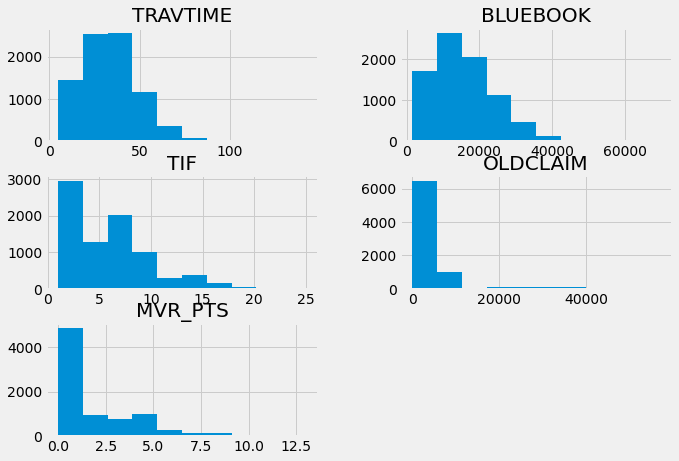

In [128]:
#we visualize them
df_numvars.hist(figsize=(10, 7))
plt.show()

In [129]:
from sklearn.preprocessing import MinMaxScaler

In [130]:
#We scale with a MinMax rescaling to [0, 1]

# MinMax Rescaling to [0,1]
df_numvars_minmax = pd.DataFrame(MinMaxScaler().fit_transform(df_numvars))

In [131]:
df_numvars_minmax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8141 entries, 0 to 8140
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       8141 non-null   float64
 1   1       8141 non-null   float64
 2   2       8141 non-null   float64
 3   3       8141 non-null   float64
 4   4       8141 non-null   float64
dtypes: float64(5)
memory usage: 318.1 KB


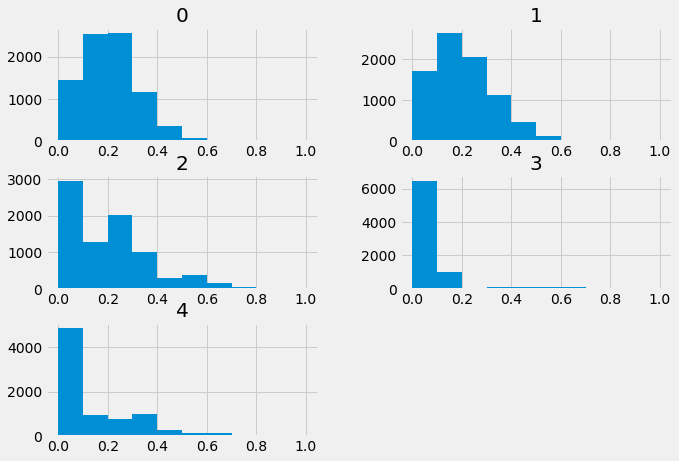

In [132]:
df_numvars_minmax.hist(figsize=(10, 7))
plt.show()

In [133]:
#we put the scaled variables in the dataset

for i in range(0, 5):
    #print(df_numvars.index[i])
    df_train[numvars[i]] = np.array(df_numvars_minmax[df_numvars_minmax.index[i]])

df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8141 entries, 1 to 10302
Data columns (total 73 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   TARGET_FLAG                     8141 non-null   int64  
 1   TRAVTIME                        8141 non-null   float64
 2   BLUEBOOK                        8141 non-null   float64
 3   TIF                             8141 non-null   float64
 4   OLDCLAIM                        8141 non-null   float64
 5   MVR_PTS                         8141 non-null   float64
 6   PARENT1_Yes                     8141 non-null   uint8  
 7   MSTATUS_Yes                     8141 non-null   uint8  
 8   SEX_M                           8141 non-null   uint8  
 9   EDUCATION_Bachelors             8141 non-null   uint8  
 10  EDUCATION_High School           8141 non-null   uint8  
 11  EDUCATION_Masters               8141 non-null   uint8  
 12  EDUCATION_PhD                   8

## Spliting the dataset

We split the DataFrame between 
- X : The features
- Y : The targets

Using train_test_split function and taking 30% for the test set

In [135]:
from sklearn.model_selection import train_test_split

In [134]:
X = df_train.drop("TARGET_FLAG", 1).values
Y = df_train[["TARGET_FLAG"]].values

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, Y[:, 0], test_size=0.3, random_state=1)

# Prediction

## Evaluation Metrics definition

In [137]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

We choose precision as the scoring metric, defined as "the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative." (source sklearn)

Indeed we believe that wrongly identifying as positive/negative a sample would cause harm. 

(I would need more "business insight" to fine tune the scoring metric, as it might be more useful not to label as negative a sample that is positive)

In [138]:
# Cross Validation to test and anticipate overfitting problem
def crossvalidate(clf, X, y):
    precision = cross_val_score(clf, X, y, cv=10, scoring='precision')
    recall = cross_val_score(clf, X, y, cv=10, scoring='recall')
    f1 = cross_val_score(clf, X, y, cv=10, scoring='f1')
    roc_auc = cross_val_score(clf, X, y, cv=10, scoring='roc_auc')
    accuracy = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
    # The mean score and standard deviation of the score estimate
    print("Cross Validation Precision: %0.2f (+/- %0.2f)" % (precision.mean(), precision.std()))
    print("Cross Validation Recall: %0.2f (+/- %0.2f)" % (recall.mean(), recall.std()))
    print("Cross Validation f1 score: %0.2f (+/- %0.2f)" % (f1.mean(), f1.std()))
    print("Cross Validation roc_auc: %0.2f (+/- %0.2f)" % (roc_auc.mean(), roc_auc.std()))
    print("Cross Validation Accuracy: %0.2f (+/- %0.2f)" % (accuracy.mean(), accuracy.std()))

In [139]:
def plot_confusion_matrix(clf, X, y):
    # Predict the test data using the best model
    y_pred = clf.predict(X)
    # Create the confusion matrix 
    confmat = confusion_matrix(y_true=y, y_pred=y_pred)
    # Plot the confusion matrix in a fancy way 
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    plt.xlabel('predicted label')
    plt.ylabel('true label')
    plt.tight_layout()
    plt.show()

In [140]:
#for all models, we will use GridSearch
from sklearn.model_selection import GridSearchCV
#and build pipeline
from sklearn.pipeline import Pipeline

## Random Forest

We first try a Random Forest Classifier, but since the dimension is high, we will try to reduce it. 
We therefore use SVD as a dimensionality reduction technique.

In [141]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import TruncatedSVD

In [142]:
# Create a default model
pipe_rf = Pipeline([('svd', TruncatedSVD(n_components=2)),
                    ('clf', RandomForestClassifier(n_estimators=10))])

# Create a list of choices for each hyperparameter
param_range_svd = [5, 10, 15, 20] # dimension of the data after dimensionality reduction 
param_range_clf = [5, 10, 20, 30, 60, 120] # number of trees in RandomForest

# Create the grid of possible combinations 
param_grid = [{'svd__n_components': param_range_svd,
               'clf__n_estimators': param_range_clf,
               'clf__max_features': param_range_clf}]

# Prepare the Grid Search Fine Tuning 
gs = GridSearchCV(estimator=pipe_rf, # the model
                  param_grid=param_grid, # its hyperparameters possibilities
                  scoring='precision', # precision is the evaluation metric
                  cv=5, # We use 5 folds in cross validation
                  n_jobs=-1)

# Test all the possible hyperparamters
gs = gs.fit(X_train, y_train)

# The best hyperparameters
print("The optimal precision is {}".format(gs.best_score_))
print("The optimal hyperparameters are {}".format(gs.best_params_))

The optimal precision is 0.5827255403062004
The optimal hyperparameters are {'clf__max_features': 5, 'clf__n_estimators': 120, 'svd__n_components': 20}


Cross Validation Precision: 0.58 (+/- 0.04)
Cross Validation Recall: 0.24 (+/- 0.04)
Cross Validation f1 score: 0.34 (+/- 0.03)
Cross Validation roc_auc: 0.74 (+/- 0.01)
Cross Validation Accuracy: 0.76 (+/- 0.01)


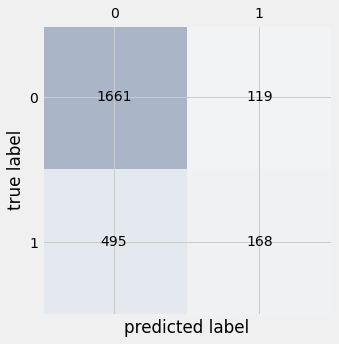

In [143]:
# Optimal model
best_rf_svd = gs.best_estimator_
# Evaluation performances
crossvalidate(best_rf_svd, X_train, y_train)
# Confusion Matrix
plot_confusion_matrix(best_rf_svd, X_test, y_test)

## Logistic Regression and PCA

We then try a Logistic Regression Classifier, but the the same problem arises with the dimension. 
We therefore use PCA as a dimensionality reduction technique.

In [144]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA


In [145]:
# Create a default model
pipe_lr = Pipeline([('pca', PCA(n_components=2)),
                    ('clf', LogisticRegression(penalty='l2', random_state=1,  solver='liblinear'))])

# Create a list of choices for each hyperparameter
param_range_pca = [2, 5, 10, 5, 20] # dimension of the data after dimensionality reduction 
param_clf = ['l1', 'l2'] 

# Create the grid of possible combinations 
param_grid = [{'pca__n_components': param_range_pca,
               'clf__penalty': param_clf}]

# Prepare the Grid Search Fine Tuning 
gs = GridSearchCV(estimator=pipe_lr, # the model
                  param_grid=param_grid, # its hyperparameters possibilities
                  scoring='precision', # precision is the evaluation metric
                  cv=5, # We use 5 folds in cross validation
                  n_jobs=-1)

# Test all the possible hyperparamters
gs = gs.fit(X_train, y_train)

# The best hyperparameters
print("The optimal precision is {}".format(gs.best_score_))
print("The optimal hyperparameters are {}".format(gs.best_params_))

The optimal precision is 0.6124677221252564
The optimal hyperparameters are {'clf__penalty': 'l2', 'pca__n_components': 20}


Cross Validation Precision: 0.62 (+/- 0.05)
Cross Validation Recall: 0.27 (+/- 0.02)
Cross Validation f1 score: 0.37 (+/- 0.02)
Cross Validation roc_auc: 0.76 (+/- 0.02)
Cross Validation Accuracy: 0.77 (+/- 0.01)


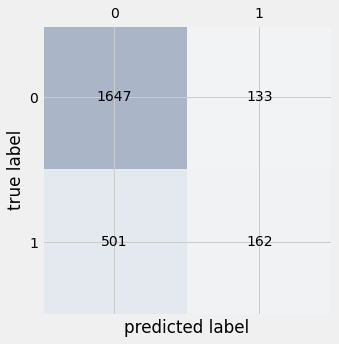

In [146]:
best_pca_lr = gs.best_estimator_
crossvalidate(best_pca_lr, X_train, y_train)
plot_confusion_matrix(best_pca_lr, X_test, y_test)

## Nearest Neighbor

We then try a Nearest Neighbor Classifier, with SVD as a dimensionality reduction technique.

In [147]:
from sklearn.neighbors import KNeighborsClassifier

In [157]:
# Create a default model
pipe_nn = Pipeline([('svd', TruncatedSVD(n_components=2)),
                    ('clf', KNeighborsClassifier())])

# Create a list of choices for each hyperparameter
param_range_svd = [5, 10, 15, 20] # dimension of the data after dimensionality reduction 
param_range_clf = [3, 7, 10, 15, 30, 50, 100, 200] # number of neighbors

# Create the grid of possible combinations 
param_grid = [{'svd__n_components': param_range_svd,
               'clf__n_neighbors': param_range_clf}]

# Prepare the Grid Search Fine Tuning 
gs = GridSearchCV(estimator=pipe_nn, # the model
                  param_grid=param_grid, # its hyperparameters possibilities
                  scoring='precision', # precision is the evaluation metric
                  cv=5, # We use 5 folds in cross validation
                  n_jobs=-1)

# Test all the possible hyperparamters
gs = gs.fit(X_train, y_train)

# The best hyperparameters
print("The optimal precision is {}".format(gs.best_score_))
print("The optimal hyperparameters are {}".format(gs.best_params_))

The optimal precision is 0.7454545454545455
The optimal hyperparameters are {'clf__n_neighbors': 200, 'svd__n_components': 20}


Cross Validation Precision: 0.68 (+/- 0.18)
Cross Validation Recall: 0.03 (+/- 0.01)
Cross Validation f1 score: 0.05 (+/- 0.02)
Cross Validation roc_auc: 0.73 (+/- 0.02)
Cross Validation Accuracy: 0.74 (+/- 0.00)


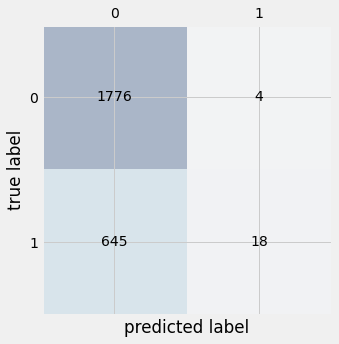

In [158]:
best_svd_nn = gs.best_estimator_
crossvalidate(best_svd_nn, X_train, y_train)
plot_confusion_matrix(best_svd_nn, X_test, y_test)

# Importation of test dataset

We import and visualize this Dataset

In [159]:
data_test = pd.read_csv("./gdrive/My Drive/Colab_Notebooks/Descartes/test_auto.csv",index_col=0,header=0,sep=',')

In [160]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2141 entries, 3 to 10300
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TARGET_FLAG  0 non-null      float64
 1   TARGET_AMT   0 non-null      float64
 2   KIDSDRIV     2141 non-null   int64  
 3   AGE          2140 non-null   float64
 4   HOMEKIDS     2141 non-null   int64  
 5   YOJ          2047 non-null   float64
 6   INCOME       2016 non-null   object 
 7   PARENT1      2141 non-null   object 
 8   HOME_VAL     2030 non-null   object 
 9   MSTATUS      2141 non-null   object 
 10  SEX          2141 non-null   object 
 11  EDUCATION    2141 non-null   object 
 12  JOB          2002 non-null   object 
 13  TRAVTIME     2141 non-null   int64  
 14  CAR_USE      2141 non-null   object 
 15  BLUEBOOK     2141 non-null   object 
 16  TIF          2141 non-null   int64  
 17  CAR_TYPE     2141 non-null   object 
 18  RED_CAR      2141 non-null   object 
 19  OLDCL

In [161]:
data_test.columns

Index(['TARGET_FLAG', 'TARGET_AMT', 'KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ',
       'INCOME', 'PARENT1', 'HOME_VAL', 'MSTATUS', 'SEX', 'EDUCATION', 'JOB',
       'TRAVTIME', 'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR',
       'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CAR_AGE', 'URBANICITY'],
      dtype='object')

In [162]:
data_test

,TARGET_FLAG,TARGET_AMT,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
INDEX,,,,,,,,,,,,,,,,,,,,,,,,,
3,NaN,NaN,0,48.0,0,11.0,"$52,881",No,$0,z_No,M,Bachelors,Manager,26,Private,"$21,970",1,Van,yes,$0,0,No,2,10.0,Highly Urban/ Urban
9,NaN,NaN,1,40.0,1,11.0,"$50,815",Yes,$0,z_No,M,z_High School,Manager,21,Private,"$18,930",6,Minivan,no,"$3,295",1,No,2,1.0,Highly Urban/ Urban
10,NaN,NaN,0,44.0,2,12.0,"$43,486",Yes,$0,z_No,z_F,z_High School,z_Blue Collar,30,Commercial,"$5,900",10,z_SUV,no,$0,0,No,0,10.0,z_Highly Rural/ Rural
18,NaN,NaN,0,35.0,2,NaN,"$21,204",Yes,$0,z_No,M,z_High School,Clerical,74,Private,"$9,230",6,Pickup,no,$0,0,Yes,0,4.0,z_Highly Rural/ Rural
21,NaN,NaN,0,59.0,0,12.0,"$87,460",No,$0,z_No,M,z_High School,Manager,45,Private,"$15,420",1,Minivan,yes,"$44,857",2,No,4,1.0,Highly Urban/ Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10279,NaN,NaN,0,46.0,0,0.0,$0,No,$0,Yes,z_F,z_High School,Student,32,Commercial,"$1,500",6,Sports Car,no,"$20,519",1,Yes,3,8.0,z_Highly Rural/ Rural
10281,NaN,NaN,0,46.0,0,12.0,"$43,501",No,"$134,977",Yes,M,z_High School,Professional,60,Private,"$16,080",3,Minivan,no,$0,0,No,2,1.0,z_Highly Rural/ Rural
10285,NaN,NaN,0,55.0,0,10.0,"$141,083",No,"$393,624",Yes,z_F,Masters,Lawyer,42,Private,"$21,110",10,Sports Car,no,$0,0,No,0,22.0,z_Highly Rural/ Rural


In [163]:
allcolumns_test = ['KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'PARENT1', 'HOME_VAL', 'MSTATUS', 'SEX', 'EDUCATION', 'JOB', 'TRAVTIME', 'CAR_USE', 'BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR', 'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CAR_AGE', 'URBANICITY']

In [164]:
data_test = data_test.drop(['TARGET_AMT', 'TARGET_FLAG'], axis='columns')

In [165]:
#visualize the data in every column
data_test.head(10)

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
INDEX,,,,,,,,,,,,,,,,,,,,,,,
3,0,48.0,0,11.0,"$52,881",No,$0,z_No,M,Bachelors,Manager,26,Private,"$21,970",1,Van,yes,$0,0,No,2,10.0,Highly Urban/ Urban
9,1,40.0,1,11.0,"$50,815",Yes,$0,z_No,M,z_High School,Manager,21,Private,"$18,930",6,Minivan,no,"$3,295",1,No,2,1.0,Highly Urban/ Urban
10,0,44.0,2,12.0,"$43,486",Yes,$0,z_No,z_F,z_High School,z_Blue Collar,30,Commercial,"$5,900",10,z_SUV,no,$0,0,No,0,10.0,z_Highly Rural/ Rural
18,0,35.0,2,NaN,"$21,204",Yes,$0,z_No,M,z_High School,Clerical,74,Private,"$9,230",6,Pickup,no,$0,0,Yes,0,4.0,z_Highly Rural/ Rural
21,0,59.0,0,12.0,"$87,460",No,$0,z_No,M,z_High School,Manager,45,Private,"$15,420",1,Minivan,yes,"$44,857",2,No,4,1.0,Highly Urban/ Urban
30,0,46.0,0,14.0,NaN,No,"$207,519",Yes,M,Bachelors,Professional,7,Commercial,"$25,660",1,Panel Truck,no,"$2,119",1,No,2,12.0,Highly Urban/ Urban
31,0,60.0,0,12.0,"$37,940",No,"$182,739",Yes,z_F,z_High School,z_Blue Collar,16,Commercial,"$11,290",1,Sports Car,no,$0,0,No,0,1.0,Highly Urban/ Urban
37,0,54.0,0,12.0,"$33,212",No,"$158,432",Yes,M,<High School,z_Blue Collar,27,Commercial,"$24,000",4,Panel Truck,no,$0,0,No,5,NaN,Highly Urban/ Urban
39,2,36.0,2,12.0,"$130,540",Yes,"$344,195",z_No,z_F,Bachelors,z_Blue Collar,5,Commercial,"$27,200",4,Minivan,no,$0,0,No,0,9.0,z_Highly Rural/ Rural


In [166]:
#since all columns are not visible in the cell above, split the DataFrame to visualize it
columns_part1 = ['KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'PARENT1', 'HOME_VAL', 'MSTATUS', 'SEX', 'EDUCATION', 'JOB', 'TRAVTIME', 'CAR_USE']
columns_part2 = ['BLUEBOOK', 'TIF', 'CAR_TYPE', 'RED_CAR', 'OLDCLAIM', 'CLM_FREQ', 'REVOKED', 'MVR_PTS', 'CAR_AGE', 'URBANICITY']

df_visualization1 = data_train[columns_part1]
df_visualization2 = data_train[columns_part2]

In [167]:
df_visualization1.head(10)

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE
INDEX,,,,,,,,,,,,,
1,0,60.0,0,11.0,"$67,349",No,$0,z_No,M,PhD,Professional,14,Private
2,0,43.0,0,11.0,"$91,449",No,"$257,252",z_No,M,z_High School,z_Blue Collar,22,Commercial
4,0,35.0,1,10.0,"$16,039",No,"$124,191",Yes,z_F,z_High School,Clerical,5,Private
5,0,51.0,0,14.0,NaN,No,"$306,251",Yes,M,<High School,z_Blue Collar,32,Private
6,0,50.0,0,NaN,"$114,986",No,"$243,925",Yes,z_F,PhD,Doctor,36,Private
7,0,34.0,1,12.0,"$125,301",Yes,$0,z_No,z_F,Bachelors,z_Blue Collar,46,Commercial
8,0,54.0,0,NaN,"$18,755",No,NaN,Yes,z_F,<High School,z_Blue Collar,33,Private
11,1,37.0,2,NaN,"$107,961",No,"$333,680",Yes,M,Bachelors,z_Blue Collar,44,Commercial
12,0,34.0,0,10.0,"$62,978",No,$0,z_No,z_F,Bachelors,Clerical,34,Private


In [168]:
df_visualization2.head(10)

,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
INDEX,,,,,,,,,,
1,"$14,230",11,Minivan,yes,"$4,461",2,No,3,18.0,Highly Urban/ Urban
2,"$14,940",1,Minivan,yes,$0,0,No,0,1.0,Highly Urban/ Urban
4,"$4,010",4,z_SUV,no,"$38,690",2,No,3,10.0,Highly Urban/ Urban
5,"$15,440",7,Minivan,yes,$0,0,No,0,6.0,Highly Urban/ Urban
6,"$18,000",1,z_SUV,no,"$19,217",2,Yes,3,17.0,Highly Urban/ Urban
7,"$17,430",1,Sports Car,no,$0,0,No,0,7.0,Highly Urban/ Urban
8,"$8,780",1,z_SUV,no,$0,0,No,0,1.0,Highly Urban/ Urban
11,"$16,970",1,Van,yes,"$2,374",1,Yes,10,7.0,Highly Urban/ Urban
12,"$11,200",1,z_SUV,no,$0,0,No,0,1.0,Highly Urban/ Urban


# Data Preprocessing

In [1]:
#we will follow the steps highlighted in the preprocessing of the train Dataset

In [169]:
df_test = data_test.copy()

## String to numerical

In [170]:
#We see that some columns are categorized as object because of a $ sign while they should actually be numerical
#We list them in the following list and modifiy them with a dollarsum_to_int function
shouldBeNum = ['INCOME', 'HOME_VAL', 'BLUEBOOK', 'OLDCLAIM']

In [171]:
#use the dollarsum_to_int_vect function on the columns listes above 
for col in shouldBeNum : 
    df_test[col] = dollarsum_to_int_vect(df_test[col])

df_test.head(10) 

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY
INDEX,,,,,,,,,,,,,,,,,,,,,,,
3,0,48.0,0,11.0,52881.0,No,0.0,z_No,M,Bachelors,Manager,26,Private,21970.0,1,Van,yes,0.0,0,No,2,10.0,Highly Urban/ Urban
9,1,40.0,1,11.0,50815.0,Yes,0.0,z_No,M,z_High School,Manager,21,Private,18930.0,6,Minivan,no,3295.0,1,No,2,1.0,Highly Urban/ Urban
10,0,44.0,2,12.0,43486.0,Yes,0.0,z_No,z_F,z_High School,z_Blue Collar,30,Commercial,5900.0,10,z_SUV,no,0.0,0,No,0,10.0,z_Highly Rural/ Rural
18,0,35.0,2,NaN,21204.0,Yes,0.0,z_No,M,z_High School,Clerical,74,Private,9230.0,6,Pickup,no,0.0,0,Yes,0,4.0,z_Highly Rural/ Rural
21,0,59.0,0,12.0,87460.0,No,0.0,z_No,M,z_High School,Manager,45,Private,15420.0,1,Minivan,yes,44857.0,2,No,4,1.0,Highly Urban/ Urban
30,0,46.0,0,14.0,NaN,No,207519.0,Yes,M,Bachelors,Professional,7,Commercial,25660.0,1,Panel Truck,no,2119.0,1,No,2,12.0,Highly Urban/ Urban
31,0,60.0,0,12.0,37940.0,No,182739.0,Yes,z_F,z_High School,z_Blue Collar,16,Commercial,11290.0,1,Sports Car,no,0.0,0,No,0,1.0,Highly Urban/ Urban
37,0,54.0,0,12.0,33212.0,No,158432.0,Yes,M,<High School,z_Blue Collar,27,Commercial,24000.0,4,Panel Truck,no,0.0,0,No,5,NaN,Highly Urban/ Urban
39,2,36.0,2,12.0,130540.0,Yes,344195.0,z_No,z_F,Bachelors,z_Blue Collar,5,Commercial,27200.0,4,Minivan,no,0.0,0,No,0,9.0,z_Highly Rural/ Rural


In [179]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2141 entries, 3 to 10300
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   KIDSDRIV    2141 non-null   int64  
 1   AGE         2140 non-null   float64
 2   HOMEKIDS    2141 non-null   int64  
 3   YOJ         2047 non-null   float64
 4   INCOME      2016 non-null   float64
 5   PARENT1     2141 non-null   object 
 6   HOME_VAL    2030 non-null   float64
 7   MSTATUS     2141 non-null   object 
 8   SEX         2141 non-null   object 
 9   EDUCATION   2141 non-null   object 
 10  JOB         2141 non-null   object 
 11  TRAVTIME    2141 non-null   int64  
 12  CAR_USE     2141 non-null   object 
 13  BLUEBOOK    2141 non-null   float64
 14  TIF         2141 non-null   int64  
 15  CAR_TYPE    2141 non-null   object 
 16  RED_CAR     2141 non-null   object 
 17  OLDCLAIM    2141 non-null   float64
 18  CLM_FREQ    2141 non-null   int64  
 19  REVOKED     2141 non-null 

In [180]:
df_test.columns

Index(['KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'PARENT1', 'HOME_VAL',
       'MSTATUS', 'SEX', 'EDUCATION', 'JOB', 'TRAVTIME', 'CAR_USE', 'BLUEBOOK',
       'TIF', 'CAR_TYPE', 'RED_CAR', 'OLDCLAIM', 'CLM_FREQ', 'REVOKED',
       'MVR_PTS', 'CAR_AGE', 'URBANICITY'],
      dtype='object')

In [181]:
#We divide the dataset between categorical and numerical variables, listes below
catvars = ['PARENT1', 'MSTATUS', 'SEX', 'EDUCATION', 'JOB', 'CAR_USE', 'CAR_TYPE', 'RED_CAR', 'REVOKED', 'URBANICITY']
numvars = ['KIDSDRIV', 'AGE', 'HOMEKIDS', 'YOJ', 'INCOME', 'HOME_VAL', 'TRAVTIME', 'BLUEBOOK', 'TIF', 'OLDCLAIM', 'CLM_FREQ', 'MVR_PTS', 'CAR_AGE']
print(len(catvars), len(numvars))

10 13


In [182]:
df_test[numvars].describe()

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CAR_AGE
count,2141.000000,2140.000000,2141.000000,2047.000000,2016.000000,2030.000000,2141.000000,2141.000000,2141.000000,2141.000000,2141.000000,2141.000000,2012.000000
mean,0.162541,45.016822,0.717422,10.379091,60324.265377,153217.671429,33.152265,15469.425502,5.244745,4022.167679,0.808968,1.765997,8.183400
std,0.486949,8.525006,1.116579,4.170008,47003.422189,129456.870285,15.722393,8462.367121,3.971026,8565.379145,1.137481,2.203413,5.766263
min,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1500.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,39.000000,0.000000,9.000000,25817.750000,0.000000,22.000000,8870.000000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,45.000000,0.000000,11.000000,51778.000000,158840.000000,33.000000,14170.000000,4.000000,0.000000,0.000000,1.000000,8.000000
75%,0.000000,51.000000,1.000000,13.000000,86278.250000,236651.500000,43.000000,21050.000000,7.000000,4718.000000,2.000000,3.000000,12.000000
max,3.000000,73.000000,5.000000,19.000000,291182.000000,669271.000000,105.000000,49940.000000,25.000000,54399.000000,5.000000,12.000000,26.000000


## Typos in categorical

We eliminate the 'z_', like in the train dataset

In [176]:
#Visualize the different values in catvars
for var in catvars :
    print(var, " : ", df_test[var].unique())

PARENT1  :  ['No' 'Yes']
MSTATUS  :  ['z_No' 'Yes']
SEX  :  ['M' 'z_F']
EDUCATION  :  ['Bachelors' 'z_High School' '<High School' 'PhD' 'Masters']
JOB  :  ['Manager' 'z_Blue Collar' 'Clerical' 'Professional' 'Doctor' 'Lawyer' nan
 'Student' 'Home Maker']
CAR_USE  :  ['Private' 'Commercial']
CAR_TYPE  :  ['Van' 'Minivan' 'z_SUV' 'Pickup' 'Panel Truck' 'Sports Car']
RED_CAR  :  ['yes' 'no']
REVOKED  :  ['No' 'Yes']
URBANICITY  :  ['Highly Urban/ Urban' 'z_Highly Rural/ Rural']


In [177]:
#we use the delete_typos_vect function to delet typos
for var in catvars :
    print(var)
    df_test[var] = delete_typos_vect(df_test[var])


PARENT1
MSTATUS
SEX
EDUCATION
JOB
CAR_USE
CAR_TYPE
RED_CAR
REVOKED
URBANICITY


In [178]:
for var in catvars :
    print(var, " : ", df_test[var].unique())

PARENT1  :  ['No' 'Yes']
MSTATUS  :  ['No' 'Yes']
SEX  :  ['M' 'F']
EDUCATION  :  ['Bachelors' 'High School' '<High School' 'PhD' 'Masters']
JOB  :  ['Manager' 'Blue Collar' 'Clerical' 'Professional' 'Doctor' 'Lawyer' 'nan'
 'Student' 'Home Maker']
CAR_USE  :  ['Private' 'Commercial']
CAR_TYPE  :  ['Van' 'Minivan' 'SUV' 'Pickup' 'Panel Truck' 'Sports Car']
RED_CAR  :  ['Yes' 'No']
REVOKED  :  ['No' 'Yes']
URBANICITY  :  ['Highly Urban/ Urban' 'Highly Rural/ Rural']


## Handling of missing values

We check which columns have missing values and how many, and for which indexes

In [183]:
df_test.isnull().any()

KIDSDRIV      False
AGE            True
HOMEKIDS      False
YOJ            True
INCOME         True
PARENT1       False
HOME_VAL       True
MSTATUS       False
SEX           False
EDUCATION     False
JOB           False
TRAVTIME      False
CAR_USE       False
BLUEBOOK      False
TIF           False
CAR_TYPE      False
RED_CAR       False
OLDCLAIM      False
CLM_FREQ      False
REVOKED       False
MVR_PTS       False
CAR_AGE        True
URBANICITY    False
dtype: bool

In [184]:
df_test.isnull().sum()

KIDSDRIV        0
AGE             1
HOMEKIDS        0
YOJ            94
INCOME        125
PARENT1         0
HOME_VAL      111
MSTATUS         0
SEX             0
EDUCATION       0
JOB             0
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CAR_AGE       129
URBANICITY      0
dtype: int64

In [185]:
all_null = ['AGE', 'YOJ', 'INCOME', 'HOME_VAL', 'CAR_AGE']

In [187]:
#we check the characteristics of the different variables we will need to 
df_test[all_null].describe()

,AGE,YOJ,INCOME,HOME_VAL,CAR_AGE
count,2140.000000,2047.000000,2016.000000,2030.000000,2012.000000
mean,45.016822,10.379091,60324.265377,153217.671429,8.183400
std,8.525006,4.170008,47003.422189,129456.870285,5.766263
min,17.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,9.000000,25817.750000,0.000000,1.000000
50%,45.000000,11.000000,51778.000000,158840.000000,8.000000
75%,51.000000,13.000000,86278.250000,236651.500000,12.000000
max,73.000000,19.000000,291182.000000,669271.000000,26.000000


In [188]:
#we first fill the NaNs with -1, value outside of the range for each variable
df_test['YOJ'] = df_test['YOJ'].fillna(-1)
df_test['INCOME'] = df_test['INCOME'].fillna(-1)
df_test['HOME_VAL'] = df_test['HOME_VAL'].fillna(-1)
df_test['CAR_AGE'] = df_test['CAR_AGE'].fillna(-1)
df_test['AGE'] = df_test['AGE'].fillna(-1)

In [189]:
#we define intervals and related categories for each new category

# YOJ intervals 
YOJ_intervals = [-2, 0, 6, 9, 10, 11, 13, 15, 25]
# YOJ Categories
YOJ_list_cats = ['Unkwown', '0-6', '6-9', '9-10', '10-11', '11-13', '13-15', '15+']

# INCOME intervals 
INCOME_intervals = [-2, 0, 1, 15000, 30000, 55000, 90000, 500000]
# INCOME Categories
INCOME_list_cats = ['Unkwown', 'None', '15k-', '15-30k', '30-55k', '55-90k', '90k+']

# HOME_VAL intervals 
HOME_VAL_intervals = [-2, 0, 1, 100000, 150000, 200000, 250000, 350000, 1000000]
# HOME_VAL Categories
HOME_VAL_list_cats = ['Unkwown', 'None', '<100k', '100-150k', '150-200k', '200-250k', '250-350k', '350k+']

# Car Age intervals 
CAR_AGE_intervals = [-2, 0, 2, 5, 8, 12, 28]
# Car Age Categories
CAR_AGE_list_cats = ['Unkwown', '0-2', '2-5', '5-8', '8-12', '12-28']


In [190]:
# Create the new columns 
df_test['YOJ_CAT'] = pd.cut(df_test['YOJ'], YOJ_intervals, labels = YOJ_list_cats, include_lowest=True)
df_test['INCOME_CAT'] = pd.cut(df_test['INCOME'], INCOME_intervals, labels = INCOME_list_cats, include_lowest=True)
df_test['HOME_VAL_CAT'] = pd.cut(df_test['HOME_VAL'], HOME_VAL_intervals, labels = HOME_VAL_list_cats, include_lowest=True)
df_test['CAR_AGE_CAT'] = pd.cut(df_test['CAR_AGE'], CAR_AGE_intervals, labels = CAR_AGE_list_cats, include_lowest=True)

In [191]:
#we check consistency
df_test

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY,YOJ_CAT,INCOME_CAT,HOME_VAL_CAT,CAR_AGE_CAT
INDEX,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,0,48.0,0,11.0,52881.0,No,0.0,No,M,Bachelors,Manager,26,Private,21970.0,1,Van,Yes,0.0,0,No,2,10.0,Highly Urban/ Urban,10-11,30-55k,Unkwown,8-12
9,1,40.0,1,11.0,50815.0,Yes,0.0,No,M,High School,Manager,21,Private,18930.0,6,Minivan,No,3295.0,1,No,2,1.0,Highly Urban/ Urban,10-11,30-55k,Unkwown,0-2
10,0,44.0,2,12.0,43486.0,Yes,0.0,No,F,High School,Blue Collar,30,Commercial,5900.0,10,SUV,No,0.0,0,No,0,10.0,Highly Rural/ Rural,11-13,30-55k,Unkwown,8-12
18,0,35.0,2,-1.0,21204.0,Yes,0.0,No,M,High School,Clerical,74,Private,9230.0,6,Pickup,No,0.0,0,Yes,0,4.0,Highly Rural/ Rural,Unkwown,15-30k,Unkwown,2-5
21,0,59.0,0,12.0,87460.0,No,0.0,No,M,High School,Manager,45,Private,15420.0,1,Minivan,Yes,44857.0,2,No,4,1.0,Highly Urban/ Urban,11-13,55-90k,Unkwown,0-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10279,0,46.0,0,0.0,0.0,No,0.0,Yes,F,High School,Student,32,Commercial,1500.0,6,Sports Car,No,20519.0,1,Yes,3,8.0,Highly Rural/ Rural,Unkwown,Unkwown,Unkwown,5-8
10281,0,46.0,0,12.0,43501.0,No,134977.0,Yes,M,High School,Professional,60,Private,16080.0,3,Minivan,No,0.0,0,No,2,1.0,Highly Rural/ Rural,11-13,30-55k,100-150k,0-2
10285,0,55.0,0,10.0,141083.0,No,393624.0,Yes,F,Masters,Lawyer,42,Private,21110.0,10,Sports Car,No,0.0,0,No,0,22.0,Highly Rural/ Rural,9-10,90k+,350k+,12-28


In [192]:
# Age intervals 
AGE_intervals = [-1, 15, 25, 35, 50, 70, 85]
# Age Categories
AGE_list_cats = ['Unknown', 'Very Young', 'Young', 'Adult', 'Middle-Aged', 'Senior']

df_test['AGE_CAT'] = pd.cut(df_test['AGE'], AGE_intervals, labels = AGE_list_cats, include_lowest=True)



In [193]:
df_test

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CAR_AGE,URBANICITY,YOJ_CAT,INCOME_CAT,HOME_VAL_CAT,CAR_AGE_CAT,AGE_CAT
INDEX,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,0,48.0,0,11.0,52881.0,No,0.0,No,M,Bachelors,Manager,26,Private,21970.0,1,Van,Yes,0.0,0,No,2,10.0,Highly Urban/ Urban,10-11,30-55k,Unkwown,8-12,Adult
9,1,40.0,1,11.0,50815.0,Yes,0.0,No,M,High School,Manager,21,Private,18930.0,6,Minivan,No,3295.0,1,No,2,1.0,Highly Urban/ Urban,10-11,30-55k,Unkwown,0-2,Adult
10,0,44.0,2,12.0,43486.0,Yes,0.0,No,F,High School,Blue Collar,30,Commercial,5900.0,10,SUV,No,0.0,0,No,0,10.0,Highly Rural/ Rural,11-13,30-55k,Unkwown,8-12,Adult
18,0,35.0,2,-1.0,21204.0,Yes,0.0,No,M,High School,Clerical,74,Private,9230.0,6,Pickup,No,0.0,0,Yes,0,4.0,Highly Rural/ Rural,Unkwown,15-30k,Unkwown,2-5,Young
21,0,59.0,0,12.0,87460.0,No,0.0,No,M,High School,Manager,45,Private,15420.0,1,Minivan,Yes,44857.0,2,No,4,1.0,Highly Urban/ Urban,11-13,55-90k,Unkwown,0-2,Middle-Aged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10279,0,46.0,0,0.0,0.0,No,0.0,Yes,F,High School,Student,32,Commercial,1500.0,6,Sports Car,No,20519.0,1,Yes,3,8.0,Highly Rural/ Rural,Unkwown,Unkwown,Unkwown,5-8,Adult
10281,0,46.0,0,12.0,43501.0,No,134977.0,Yes,M,High School,Professional,60,Private,16080.0,3,Minivan,No,0.0,0,No,2,1.0,Highly Rural/ Rural,11-13,30-55k,100-150k,0-2,Adult
10285,0,55.0,0,10.0,141083.0,No,393624.0,Yes,F,Masters,Lawyer,42,Private,21110.0,10,Sports Car,No,0.0,0,No,0,22.0,Highly Rural/ Rural,9-10,90k+,350k+,12-28,Middle-Aged


In [194]:
#we drop the "old" columns
df_test = df_test.drop(all_null, axis = 'columns')
df_test

,KIDSDRIV,HOMEKIDS,PARENT1,MSTATUS,SEX,EDUCATION,JOB,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,URBANICITY,YOJ_CAT,INCOME_CAT,HOME_VAL_CAT,CAR_AGE_CAT,AGE_CAT
INDEX,,,,,,,,,,,,,,,,,,,,,,,
3,0,0,No,No,M,Bachelors,Manager,26,Private,21970.0,1,Van,Yes,0.0,0,No,2,Highly Urban/ Urban,10-11,30-55k,Unkwown,8-12,Adult
9,1,1,Yes,No,M,High School,Manager,21,Private,18930.0,6,Minivan,No,3295.0,1,No,2,Highly Urban/ Urban,10-11,30-55k,Unkwown,0-2,Adult
10,0,2,Yes,No,F,High School,Blue Collar,30,Commercial,5900.0,10,SUV,No,0.0,0,No,0,Highly Rural/ Rural,11-13,30-55k,Unkwown,8-12,Adult
18,0,2,Yes,No,M,High School,Clerical,74,Private,9230.0,6,Pickup,No,0.0,0,Yes,0,Highly Rural/ Rural,Unkwown,15-30k,Unkwown,2-5,Young
21,0,0,No,No,M,High School,Manager,45,Private,15420.0,1,Minivan,Yes,44857.0,2,No,4,Highly Urban/ Urban,11-13,55-90k,Unkwown,0-2,Middle-Aged
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10279,0,0,No,Yes,F,High School,Student,32,Commercial,1500.0,6,Sports Car,No,20519.0,1,Yes,3,Highly Rural/ Rural,Unkwown,Unkwown,Unkwown,5-8,Adult
10281,0,0,No,Yes,M,High School,Professional,60,Private,16080.0,3,Minivan,No,0.0,0,No,2,Highly Rural/ Rural,11-13,30-55k,100-150k,0-2,Adult
10285,0,0,No,Yes,F,Masters,Lawyer,42,Private,21110.0,10,Sports Car,No,0.0,0,No,0,Highly Rural/ Rural,9-10,90k+,350k+,12-28,Middle-Aged


In [195]:
#we modify the lists of categorical and numerical variables
for var in all_null:
    catvars.append(var+"_CAT")
catvars

['PARENT1',
 'MSTATUS',
 'SEX',
 'EDUCATION',
 'JOB',
 'CAR_USE',
 'CAR_TYPE',
 'RED_CAR',
 'REVOKED',
 'URBANICITY',
 'AGE_CAT',
 'YOJ_CAT',
 'INCOME_CAT',
 'HOME_VAL_CAT',
 'CAR_AGE_CAT']

In [196]:
numvars = ['KIDSDRIV', 'HOMEKIDS', 'TRAVTIME', 'BLUEBOOK', 'TIF', 'OLDCLAIM', 'CLM_FREQ', 'MVR_PTS']

In [197]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2141 entries, 3 to 10300
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   KIDSDRIV      2141 non-null   int64   
 1   HOMEKIDS      2141 non-null   int64   
 2   PARENT1       2141 non-null   object  
 3   MSTATUS       2141 non-null   object  
 4   SEX           2141 non-null   object  
 5   EDUCATION     2141 non-null   object  
 6   JOB           2141 non-null   object  
 7   TRAVTIME      2141 non-null   int64   
 8   CAR_USE       2141 non-null   object  
 9   BLUEBOOK      2141 non-null   float64 
 10  TIF           2141 non-null   int64   
 11  CAR_TYPE      2141 non-null   object  
 12  RED_CAR       2141 non-null   object  
 13  OLDCLAIM      2141 non-null   float64 
 14  CLM_FREQ      2141 non-null   int64   
 15  REVOKED       2141 non-null   object  
 16  MVR_PTS       2141 non-null   int64   
 17  URBANICITY    2141 non-null   object  
 18  YOJ_CAT

## Categorize some variables

In [198]:
df_test[numvars].describe()

,KIDSDRIV,HOMEKIDS,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS
count,2141.000000,2141.000000,2141.000000,2141.000000,2141.000000,2141.000000,2141.000000,2141.000000
mean,0.162541,0.717422,33.152265,15469.425502,5.244745,4022.167679,0.808968,1.765997
std,0.486949,1.116579,15.722393,8462.367121,3.971026,8565.379145,1.137481,2.203413
min,0.000000,0.000000,5.000000,1500.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,22.000000,8870.000000,1.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,14170.000000,4.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,43.000000,21050.000000,7.000000,4718.000000,2.000000,3.000000
max,3.000000,5.000000,105.000000,49940.000000,25.000000,54399.000000,5.000000,12.000000


Based on this, we decide to transform the variables KIDSDRIV, CLM_FREQ and HOMEKIDS into categorical variables

In [199]:
catvars.append('KIDSDRIV')
catvars.append('HOMEKIDS')
catvars.append('CLM_FREQ')

numvars = ['TRAVTIME', 'BLUEBOOK', 'TIF', 'OLDCLAIM', 'MVR_PTS']

## Preprocessing categorical variables

In [201]:
for feature in catvars:
    print("Feature: {} ... Categories: {}".format(feature, df_test[feature].unique()))

df_test[catvars].nunique()

Feature: PARENT1 ... Categories: ['No' 'Yes']
Feature: MSTATUS ... Categories: ['No' 'Yes']
Feature: SEX ... Categories: ['M' 'F']
Feature: EDUCATION ... Categories: ['Bachelors' 'High School' '<High School' 'PhD' 'Masters']
Feature: JOB ... Categories: ['Manager' 'Blue Collar' 'Clerical' 'Professional' 'Doctor' 'Lawyer' 'nan'
 'Student' 'Home Maker']
Feature: CAR_USE ... Categories: ['Private' 'Commercial']
Feature: CAR_TYPE ... Categories: ['Van' 'Minivan' 'SUV' 'Pickup' 'Panel Truck' 'Sports Car']
Feature: RED_CAR ... Categories: ['Yes' 'No']
Feature: REVOKED ... Categories: ['No' 'Yes']
Feature: URBANICITY ... Categories: ['Highly Urban/ Urban' 'Highly Rural/ Rural']
Feature: AGE_CAT ... Categories: ['Adult', 'Young', 'Middle-Aged', 'Senior', 'Very Young', 'Unknown']
Categories (6, object): ['Unknown' < 'Very Young' < 'Young' < 'Adult' < 'Middle-Aged' < 'Senior']
Feature: YOJ_CAT ... Categories: ['10-11', '11-13', 'Unkwown', '13-15', '6-9', '0-6', '9-10', '15+']
Categories (8, obje

PARENT1         2
MSTATUS         2
SEX             2
EDUCATION       5
JOB             9
CAR_USE         2
CAR_TYPE        6
RED_CAR         2
REVOKED         2
URBANICITY      2
AGE_CAT         6
YOJ_CAT         8
INCOME_CAT      6
HOME_VAL_CAT    7
CAR_AGE_CAT     6
KIDSDRIV        4
HOMEKIDS        6
CLM_FREQ        6
dtype: int64

In [202]:
#we use get_dummies to perform a 1_Hot encoding on the categorical variables

df_test = pd.get_dummies(df_test, columns= catvars, drop_first=True)

df_test.columns

Index(['TRAVTIME', 'BLUEBOOK', 'TIF', 'OLDCLAIM', 'MVR_PTS', 'PARENT1_Yes',
       'MSTATUS_Yes', 'SEX_M', 'EDUCATION_Bachelors', 'EDUCATION_High School',
       'EDUCATION_Masters', 'EDUCATION_PhD', 'JOB_Clerical', 'JOB_Doctor',
       'JOB_Home Maker', 'JOB_Lawyer', 'JOB_Manager', 'JOB_Professional',
       'JOB_Student', 'JOB_nan', 'CAR_USE_Private', 'CAR_TYPE_Panel Truck',
       'CAR_TYPE_Pickup', 'CAR_TYPE_SUV', 'CAR_TYPE_Sports Car',
       'CAR_TYPE_Van', 'RED_CAR_Yes', 'REVOKED_Yes',
       'URBANICITY_Highly Urban/ Urban', 'AGE_CAT_Very Young', 'AGE_CAT_Young',
       'AGE_CAT_Adult', 'AGE_CAT_Middle-Aged', 'AGE_CAT_Senior', 'YOJ_CAT_0-6',
       'YOJ_CAT_6-9', 'YOJ_CAT_9-10', 'YOJ_CAT_10-11', 'YOJ_CAT_11-13',
       'YOJ_CAT_13-15', 'YOJ_CAT_15+', 'INCOME_CAT_None', 'INCOME_CAT_15k-',
       'INCOME_CAT_15-30k', 'INCOME_CAT_30-55k', 'INCOME_CAT_55-90k',
       'INCOME_CAT_90k+', 'HOME_VAL_CAT_None', 'HOME_VAL_CAT_<100k',
       'HOME_VAL_CAT_100-150k', 'HOME_VAL_CAT_150-200k

In [203]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2141 entries, 3 to 10300
Data columns (total 72 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   TRAVTIME                        2141 non-null   int64  
 1   BLUEBOOK                        2141 non-null   float64
 2   TIF                             2141 non-null   int64  
 3   OLDCLAIM                        2141 non-null   float64
 4   MVR_PTS                         2141 non-null   int64  
 5   PARENT1_Yes                     2141 non-null   uint8  
 6   MSTATUS_Yes                     2141 non-null   uint8  
 7   SEX_M                           2141 non-null   uint8  
 8   EDUCATION_Bachelors             2141 non-null   uint8  
 9   EDUCATION_High School           2141 non-null   uint8  
 10  EDUCATION_Masters               2141 non-null   uint8  
 11  EDUCATION_PhD                   2141 non-null   uint8  
 12  JOB_Clerical                    2

## Preprocessing Numerical Variables

In [204]:
#We split the numerical variables from the rest of the dataset

df_numvars = df_test[numvars]
df_numvars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2141 entries, 3 to 10300
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TRAVTIME  2141 non-null   int64  
 1   BLUEBOOK  2141 non-null   float64
 2   TIF       2141 non-null   int64  
 3   OLDCLAIM  2141 non-null   float64
 4   MVR_PTS   2141 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 100.4 KB


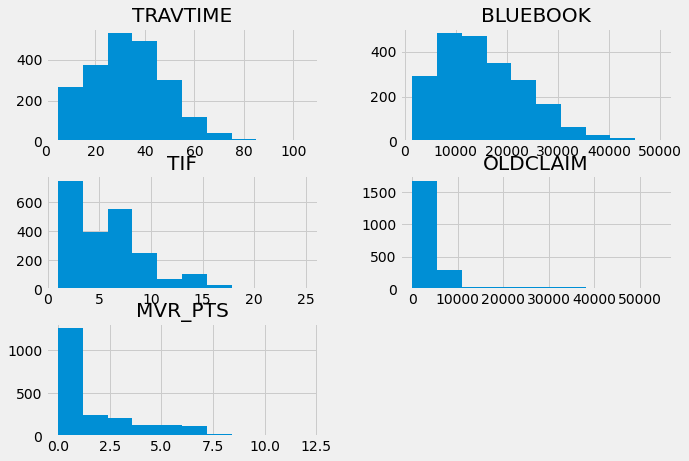

In [205]:
df_numvars.hist(figsize=(10, 7))
plt.show()

In [207]:
#We scale with a MinMax rescaling to [0, 1]

# MinMax Rescaling to [0,1]
df_numvars_minmax = pd.DataFrame(MinMaxScaler().fit_transform(df_numvars))

In [208]:
df_numvars_minmax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2141 entries, 0 to 2140
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2141 non-null   float64
 1   1       2141 non-null   float64
 2   2       2141 non-null   float64
 3   3       2141 non-null   float64
 4   4       2141 non-null   float64
dtypes: float64(5)
memory usage: 83.8 KB


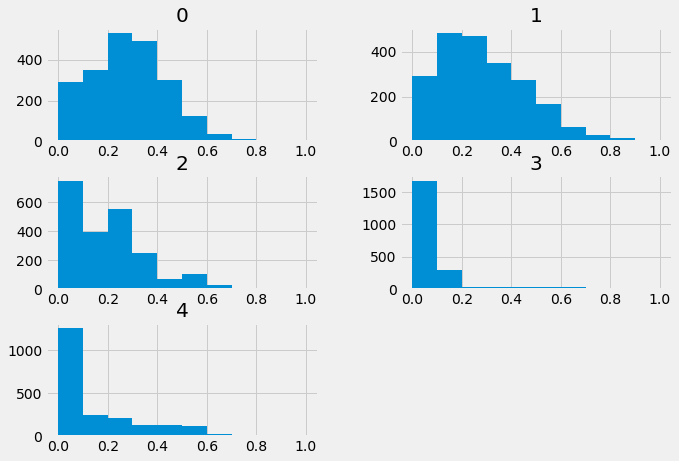

In [209]:
df_numvars_minmax.hist(figsize=(10, 7))
plt.show()

In [210]:
#we put the scaled variables in the dataset

for i in range(0, 5):
    df_test[numvars[i]] = np.array(df_numvars_minmax[df_numvars_minmax.index[i]])

df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2141 entries, 3 to 10300
Data columns (total 72 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   TRAVTIME                        2141 non-null   float64
 1   BLUEBOOK                        2141 non-null   float64
 2   TIF                             2141 non-null   float64
 3   OLDCLAIM                        2141 non-null   float64
 4   MVR_PTS                         2141 non-null   float64
 5   PARENT1_Yes                     2141 non-null   uint8  
 6   MSTATUS_Yes                     2141 non-null   uint8  
 7   SEX_M                           2141 non-null   uint8  
 8   EDUCATION_Bachelors             2141 non-null   uint8  
 9   EDUCATION_High School           2141 non-null   uint8  
 10  EDUCATION_Masters               2141 non-null   uint8  
 11  EDUCATION_PhD                   2141 non-null   uint8  
 12  JOB_Clerical                    2

# Use the chosen model to make a prediction

In [212]:
#we define a X_test which we will use to predict the values of 'TARGET_FLAG'
X_test = df_test.values

array([[0.21      , 0.42258464, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.16      , 0.35982659, 0.20833333, ..., 0.        , 0.        ,
        0.        ],
       [0.25      , 0.09083402, 0.375     , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.37      , 0.40483072, 0.375     , ..., 0.        , 0.        ,
        0.        ],
       [0.13      , 0.64946325, 0.20833333, ..., 1.        , 0.        ,
        0.        ],
       [0.07      , 0.25433526, 0.25      , ..., 0.        , 0.        ,
        0.        ]])

In [214]:
#we define the Pipeline, fit it and predict the values of 'TARGET_FLAG'
pipe_nn = Pipeline([('svd', TruncatedSVD(n_components=20)),
                    ('clf', KNeighborsClassifier(n_neighbors=100))])

model_fit = pipe_nn.fit(X, Y)
Yhat = model_fit.predict(X_test)

In [219]:
#check the consistency of Yhat
df_test['TARGET_FLAG'] = Yhat
df_test['TARGET_FLAG'].describe()
df_test['TARGET_FLAG']

INDEX
3        0
9        0
10       0
18       0
21       0
        ..
10279    0
10281    0
10285    0
10294    0
10300    0
Name: TARGET_FLAG, Length: 2141, dtype: int64

In [221]:
#exportation to a csv
data_train = df_test['TARGET_FLAG'].to_csv("./gdrive/My Drive/Colab_Notebooks/Descartes/test_answer.csv")